<p align="center">
  <img src="./img/imagen2.jpg" alt="imagen" style="border-radius: 10px; width: 90%;">
</p>

# *A la deriva*  
### **Análisis exploratorio de la distribución y dinámica de los cetáceos en España**

> Un proyecto de Data Science aplicado a la conservación marina

*Imagen de portada: Marcos Paulo Prado vía Unsplash*

---

📅 **Fecha de inicio:** 14 de abril de 2025  
👩‍💻 **Autor:** Cecilia Mendoza Peña  
🔗 **Repositorio:** [cetaceos-eda](https://github.com/tu_usuario/a-la-deriva-eda)   
⚙️ **Entorno virtual:** `venv-cetaceos`  



---


## Indice

1. [Introduccion](#1-Introduccion)  
2. [Objetivos e hipótesis de trabajo](#2-Objetivos-e-hipotesis-de-trabajo)  
3. [Carga y descripcion de los datos](#3-carga-y-descripción-de-los-datos)
    - [Carga de datos](#31-carga-de-datos)
    - [Estructura y contenido inicial](#32-estructura-y-contenido-inicial)
4. [Limpieza y transformacion](#4-limpieza-inicial-y-transformacion-de-los-datos)  
    - [Selección de variables relevantes](#41-seleccion-de-variables-relevantes)
        - [Revisón de valores de `stateprovince`](#412-revision-inicial-de-valores-de-stateprovince) 
    - [Guardado del DataFrame limpio](#42-guardar-el-dataframe-limpio-en-formato-csv)
    - [Notas sobre el proceso de carga y limpieza](#43-notas-sobre-el-proceso-de-carga-y-limpieza)
5. [Clasificacion y priorizacion de variables](#5-analisis-previo-de-variables)
    - [Definición de variables](#51-definicion-de-las-variables-del-dataframe-limpio)
    - [Análisis de cardinalidad](#52-analisis-de-cardinalidad)
    - [Calsificación de variables](#53-clasificación-y-priorización-de-variables-tabla-descriptiva)
6. [Analisis univariante](#6-analisis-exploratorio-univariante)  
   - [6.1 Validacion temporal](#61-validacion-previa-de-la-información-temporal)  
   - [6.2 Variables cuantitativas](#62-analisis-de-variables-cuantitativas)
        - [Numero de individuos por registro](#621individualcount-numero-de-individuos-por-registro)  
   - [6.3 Variables categoricas](#63-analisis-de-variables-categoricas)  
        - [Nombre científico](#631-nombre_cientifico)
        - [Regiones con más registros](#632-comunidad_autonoma-regiones-con-más-registros)
        - [Nivel taxonómico](#633-taxonrank-nivel-taxonómico-de-identificación)
        - [Incidencias](#634-issue-incidencias-o-problemas-detectados-en-el-registro)
    - [6.4 Variables numéricas geográficas](#64-analisis-exploratorio-univariante-variables-numericas-geograficas)
        - [Latitud](#641-distribución-de-la-latitud-decimallatitude)
        - [Longitud](#642-distribución-de-la-longitud-decimallongitude)
        - [Estadísticas descriptivas](#643-estadisticos-descriptivas)
        - [Outliers geográficos](#644--identificacion-de-outliers-geograficos) 
7. [Analisis bivariante](#7-analisis-bivariante)  
   - [7.1 Numerica vs Categorica](#71-categorica-vs-numerica) 
   - [7.2 Numerica vs Numerica](#72-numerica-vs-numerica)  
   - [7.3 Categorica vs Categorica](#73-categorica-vs-categorica)  
   - [Resumen](#74-resumen-del-análisis-bivariante)
8. [Analisis multivariante](#8-analisis-multivariante)  
   - [8.1 Mapa de calor de correlaciones](#81-mapa-de-calor-de-correlaciones)
   - [8.2 Visualizacion conjunta por especie y espacio](#82-visualizacion-conjunta-por-especie-y-espacio)
   - [8.3 Conclusiones del analisis multivariante](#83-conclusiones-del-analisis-multivariante)
9. [Proximos pasos](#9-proximos-pasos)


---




# 1 Introduccion
[Indice](#indice)

Este proyecto consiste en una exploración de la distribución espacial y temporal de los registros de presencia de cetáceos en aguas españolas entre los años 2000 y 2024. El objetivo es identificar patrones diferenciados por especie, posibles cambios en el tiempo, y zonas geográficas con mayor concentración de observaciones, utilizando datos abiertos procedentes del Global Biodiversity Information Facility (GBIF).

# 2 Objetivos e hipotesis de trabajo
[Indice](#indice)


El objetivo principal de este análisis es explorar la distribución espacio-temporal de los cetáceos registrados en aguas jurisdiccionales españolas durante el periodo 2000–2024, a partir de registros accesibles públicamente a través de GBIF.

De forma específica, se busca:

- Identificar las especies más registradas y con mayor número de individuos observados.
- Analizar su distribución espacial, detectando posibles zonas de concentración o solapamiento.
- Explorar, de manera preliminar, si ha habido cambios en la distribución espacial de la especie más abundante en las últimas dos décadas.
- Documentar el proceso de análisis y visualización de forma clara, reproducible y orientada a la toma de decisiones en contextos de conservación o monitoreo ambiental.

Con base en este propósito, se formulan las siguientes **hipótesis de trabajo**:

1. **Hipótesis 1**  
   La especie *Delphinus delphis* concentra el mayor número total de individuos observados en el conjunto del territorio español, lo que puede estar relacionado con su comportamiento social, amplia distribución o accesibilidad de sus hábitats a los observadores.

2. **Hipótesis 2**  
   Las comunidades autónomas de Galicia, Andalucía y Canarias presentan los mayores niveles de concentración de registros y de diversidad de especies, debido a su posición estratégica en el litoral y/o a un mayor esfuerzo de observación.

3. **Hipótesis 3 (exploratoria)**  
   La distribución espacial de *Delphinus delphis* (delfín común) ha variado en las últimas dos décadas, con un desplazamiento aparente hacia zonas del Mediterráneo o latitudes más elevadas. Esta variación podría estar relacionada con factores ecológicos como el calentamiento del agua y la distribución de presas, o con un incremento del esfuerzo de observación en ciertas regiones.

Estas hipótesis guiarán la selección e interpretación de visualizaciones finales, que se desarrollarán en un cuaderno complementario centrado en la comunicación de resultados clave.

# 3 Carga y descripción de los datos
[Indice](#indice)

### 🌐 Fuente de los datos
Los datos utilizados en este análisis proceden del portal [GBIF](https://www.gbif.org/), una infraestructura internacional que proporciona acceso abierto a datos sobre biodiversidad global. La descarga se realizó aplicando los siguientes filtros:

- Taxón: Cetacea
- Región: España
- Tipo de registro: Observación humana y observación por máquina
- Estado del individuo: Presente
- Coordenadas válidas: Sí
- Años: sin restricción explícita, pero con filtro manual posterior
- Problemas geoespaciales: false

La descarga fue procesada manualmente desde el portal web de GBIF y generó un archivo .csv, que se almacena en `data/raw/gbif_cetaceos_espana.csv`.

##  3.1 Carga de datos
[Indice](#indice)


In [1]:
# Importar librerías
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import pandas as pd
import seaborn as sns

# Añadir ruta raíz para importar scripts propios
sys.path.append(os.path.abspath("../"))

# Recargar módulos en caliente
import importlib
import scripts.limpieza
import scripts.visualizacion 

importlib.reload(scripts.limpieza)
importlib.reload(scripts.visualizacion)

# Importar funciones de limpieza
from scripts.limpieza import (
    cargar_dataset,
    limpiar_nombres_columnas,
    filtrar_por_anio,
    eliminar_filas_irrelevantes,
    extraer_anio_mes,
    mapear_comunidades_autonomas
)


# Ruta al archivo de datos
ruta = "../data/raw/gbif_cetaceos_espana.csv"
df_cetaceos = cargar_dataset(ruta)


## 3.2 Estructura y contenido inicial
[Indice](#indice)

In [2]:
# Mostrar las primeras filas
display(df_cetaceos.head())

# Mostrar información general
df_cetaceos.info()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,857005592,66f6192f-6cc0-45fd-a2d1-e76f5ae3eab2,diveboard:25796_129549_0,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Stenella,Stenella longirostris,...,Javier,2003-09-17T00:00:00,CC_BY_NC_4_0,Diveboard,Javier,NaN,NaN,2025-01-31T21:31:22.653Z,NaN,COORDINATE_REPROJECTION_SUSPICIOUS;CONTINENT_D...
1,5135648938,6ac3f774-d9fb-4796-b3e9-92bf6c81c084,NaN,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Tursiops,Tursiops truncatus,...,NaN,NaN,CC_BY_4_0,NaN,-773620108,NaN,NaN,2025-04-29T15:05:27.907Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,5135648510,6ac3f774-d9fb-4796-b3e9-92bf6c81c084,NaN,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Globicephala,Globicephala melas,...,NaN,NaN,CC_BY_4_0,NaN,-773620108,NaN,NaN,2025-04-29T15:05:15.938Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,5135622090,6ac3f774-d9fb-4796-b3e9-92bf6c81c084,NaN,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Delphinus,Delphinus delphis,...,NaN,NaN,CC_BY_4_0,NaN,-773620108,NaN,NaN,2025-04-29T15:04:01.753Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,5132000423,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/345015638,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Tursiops,Tursiops truncatus,...,NaN,NaN,CC_BY_NC_4_0,Stichting Observation International,User 190294,NaN,NaN,2025-04-22T23:24:31.719Z,StillImage,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18169 entries, 0 to 18168
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gbifID                            18169 non-null  int64  
 1   datasetKey                        18169 non-null  object 
 2   occurrenceID                      18048 non-null  object 
 3   kingdom                           18169 non-null  object 
 4   phylum                            18169 non-null  object 
 5   class                             18169 non-null  object 
 6   order                             18169 non-null  object 
 7   family                            17496 non-null  object 
 8   genus                             16773 non-null  object 
 9   species                           16460 non-null  object 
 10  infraspecificEpithet              29 non-null     object 
 11  taxonRank                         18169 non-null  object 
 12  scie

In [3]:
df_cetaceos.columns.tolist()

['gbifID',
 'datasetKey',
 'occurrenceID',
 'kingdom',
 'phylum',
 'class',
 'order',
 'family',
 'genus',
 'species',
 'infraspecificEpithet',
 'taxonRank',
 'scientificName',
 'verbatimScientificName',
 'verbatimScientificNameAuthorship',
 'countryCode',
 'locality',
 'stateProvince',
 'occurrenceStatus',
 'individualCount',
 'publishingOrgKey',
 'decimalLatitude',
 'decimalLongitude',
 'coordinateUncertaintyInMeters',
 'coordinatePrecision',
 'elevation',
 'elevationAccuracy',
 'depth',
 'depthAccuracy',
 'eventDate',
 'day',
 'month',
 'year',
 'taxonKey',
 'speciesKey',
 'basisOfRecord',
 'institutionCode',
 'collectionCode',
 'catalogNumber',
 'recordNumber',
 'identifiedBy',
 'dateIdentified',
 'license',
 'rightsHolder',
 'recordedBy',
 'typeStatus',
 'establishmentMeans',
 'lastInterpreted',
 'mediaType',
 'issue']

# 4 Limpieza inicial y transformacion de los datos
[Indice](#indice)


In [4]:
# Aplicar limpieza paso a paso
df = df_cetaceos.copy()
df = limpiar_nombres_columnas(df)
df = filtrar_por_anio(df)
df = eliminar_filas_irrelevantes(df)
df = extraer_anio_mes(df)

In [5]:
#  Después haces limpieza de formato:
cols_categoricas = ['taxonrank', 'stateprovince', 'locality', 'issue']
for col in cols_categoricas:
    df[col] = df[col].str.strip().str.lower()
    df[col] = df[col].fillna('desconocido')

In [6]:
# Mostrar primeras filas
display(df.head())

# Información general
df.info()

,gbifid,datasetkey,occurrenceid,kingdom,phylum,class,order,family,genus,species,...,license,rightsholder,recordedby,typestatus,establishmentmeans,lastinterpreted,mediatype,issue,anio,mes
0,857005592,66f6192f-6cc0-45fd-a2d1-e76f5ae3eab2,diveboard:25796_129549_0,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Stenella,Stenella longirostris,...,CC_BY_NC_4_0,Diveboard,Javier,NaN,NaN,2025-01-31T21:31:22.653Z,NaN,coordinate_reprojection_suspicious;continent_d...,2003.0,9.0
9,5108210532,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/26705...,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Globicephala,Globicephala macrorhynchus,...,CC_BY_NC_4_0,Maël Dewynter,Maël Dewynter,NaN,NaN,2025-04-16T06:19:39.243Z,StillImage,coordinate_rounded;continent_derived_from_coor...,2021.0,10.0
10,5108143503,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/26705...,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Globicephala,Globicephala macrorhynchus,...,CC_BY_NC_4_0,Maël Dewynter,Maël Dewynter,NaN,NaN,2025-04-16T06:19:37.384Z,StillImage,coordinate_rounded;continent_derived_from_coor...,2021.0,10.0
14,5104717425,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/26663...,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Stenella,Stenella frontalis,...,CC_BY_NC_4_0,patrickdebeuf,patrickdebeuf,NaN,NaN,2025-04-16T06:19:16.330Z,StillImage,coordinate_rounded;country_derived_from_coordi...,2015.0,3.0
15,5104701352,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/26663...,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Stenella,Stenella frontalis,...,CC_BY_NC_4_0,patrickdebeuf,patrickdebeuf,NaN,NaN,2025-04-16T12:50:18.963Z,StillImage,coordinate_rounded;country_derived_from_coordi...,2015.0,3.0


<class 'pandas.core.frame.DataFrame'>
Index: 15783 entries, 0 to 18168
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   gbifid                            15783 non-null  int64              
 1   datasetkey                        15783 non-null  object             
 2   occurrenceid                      15668 non-null  object             
 3   kingdom                           15783 non-null  object             
 4   phylum                            15783 non-null  object             
 5   class                             15783 non-null  object             
 6   order                             15783 non-null  object             
 7   family                            15253 non-null  object             
 8   genus                             14590 non-null  object             
 9   species                           14293 non-null  object          

## 4.1 Seleccion de variables relevantes
[Indice](#indice)

In [7]:
# Crear copia del dataframe limpio con solo las columnas de interés
columnas_interes = [
    'gbifid','anio', 'mes', 'taxonrank', 'scientificname', 'decimallatitude', 'decimallongitude',
    'eventdate', 'individualcount', 'locality', 'stateprovince', 'issue'
]

# Filtrar columnas
df_limpio = df[columnas_interes].copy()

# Estandarización y reemplazo de valores nulos
for col in cols_categoricas:
    df_limpio[col] = df_limpio[col].str.strip().str.lower()
    df_limpio[col] = df_limpio[col].fillna('desconocido')
 
    # Vista previa
df_limpio.head()

,gbifid,anio,mes,taxonrank,scientificname,decimallatitude,decimallongitude,eventdate,individualcount,locality,stateprovince,issue
0,857005592,2003.0,9.0,species,"Stenella longirostris (Gray, 1828)",27.612700,-17.989300,2003-09-17 09:30:00+00:00,NaN,punta restinga,desconocido,coordinate_reprojection_suspicious;continent_d...
9,5108210532,2021.0,10.0,species,"Globicephala macrorhynchus Gray, 1846",28.106339,-16.801829,NaT,NaN,desconocido,islas canarias,coordinate_rounded;continent_derived_from_coor...
10,5108143503,2021.0,10.0,species,"Globicephala macrorhynchus Gray, 1846",28.106434,-16.797682,NaT,NaN,desconocido,islas canarias,coordinate_rounded;continent_derived_from_coor...
14,5104717425,2015.0,3.0,species,"Stenella frontalis (G.Cuvier, 1829)",28.508595,-15.799281,NaT,NaN,desconocido,desconocido,coordinate_rounded;country_derived_from_coordi...
15,5104701352,2015.0,3.0,species,"Stenella frontalis (G.Cuvier, 1829)",28.508595,-15.799281,NaT,NaN,desconocido,desconocido,coordinate_rounded;country_derived_from_coordi...


### 4.1.2 Revision inicial de valores de stateprovince
[Indice](#indice)

Es importante realizar un recuento de los valores únicos en `stateprovince` para detectar inconsistencias o entradas problemáticas, ya que será una variable clave en el análisis. En esta revisión se encontraron valores como:
- `mar`, `desconocido`, `northern atlantic ocean` → Poco informativos o genéricos.

- Nombres duplicados o inconsistentes: `a coruña` vs `galicia`, `las palmas` y `santa cruz de tenerife` vs `islas canarias`, variantes con tildes o barras (`castellón/castelló`).

In [8]:
df["stateprovince"].unique()

array(['desconocido', 'islas canarias', 'a coruña', 'andalucía',
       'galicia', 'santa cruz de tenerife', 'murcia', 'país vasco',
       'cantabria', 'guipúzcoa', 'cataluña', 'principado de asturias',
       'asturias', 'cádiz', 'pontevedra', 'mar', 'bizkaia', 'granada',
       'málaga', 'illes balears', 'las palmas', 'huelva',
       'comunidad valenciana', 'girona', 'alicante', 'región de murcia',
       'barcelona', 'almería', 'castellón', 'islas baleares',
       'alicante/alacant', 'castellón/castelló', 'valencia/valència',
       'catalonia', 'valencia', 'tarragona', 'gipuzkoa',
       'northern atlantic ocean', 'canarias, canary islands', 'la coruna'],
      dtype=object)

In [9]:
df_limpio["stateprovince"].value_counts()

stateprovince
desconocido                 8939
mar                         3031
santa cruz de tenerife      1094
cádiz                        606
islas canarias               315
bizkaia                      241
alicante/alacant             188
pontevedra                   180
las palmas                   142
asturias                     131
galicia                      122
northern atlantic ocean      109
a coruña                     102
catalonia                     91
gipuzkoa                      88
andalucía                     69
castellón/castelló            56
murcia                        34
barcelona                     28
málaga                        25
huelva                        25
cantabria                     22
illes balears                 21
castellón                     16
cataluña                      16
país vasco                    14
girona                        12
valencia/valència             12
islas baleares                 9
alicante                     

#### Normalizacion y agrupacion de valores geograficos
En lugar de eliminar todos los registros problemáticos —lo cual supondría perder hasta el 76 % de los datos— se opta por agrupar, corregir o renombrar de forma inteligente:

In [10]:
# Comparar el número de registros antes y después
total_original = df_limpio.shape[0]
total_filtrado = df_limpio[~df_limpio["stateprovince"].isin(["mar", "desconocido", "northern atlantic ocean"])].shape[0]
perdidos = total_original - total_filtrado

print(f"Registros eliminados: {perdidos} ({(perdidos / total_original * 100):.2f}%)")

Registros eliminados: 12079 (76.53%)


Se crea una columna adicional, `comunidad_autonoma`, que estandariza todas las variantes de nombres de provincias, regiones o términos ambiguos en una clasificación coherente de 17 comunidades autónomas más una categoría “no asignado”.
Esto nos permitirá realizar análisis agregados por comunidad con mayor solidez.

In [11]:
# Aplicar mapeo completo
df_limpio = mapear_comunidades_autonomas(df_limpio)

df_limpio.head()

,gbifid,anio,mes,taxonrank,scientificname,decimallatitude,decimallongitude,eventdate,individualcount,locality,stateprovince,issue,comunidad_autonoma
0,857005592,2003.0,9.0,species,"Stenella longirostris (Gray, 1828)",27.612700,-17.989300,2003-09-17 09:30:00+00:00,NaN,punta restinga,desconocido,coordinate_reprojection_suspicious;continent_d...,no asignado
9,5108210532,2021.0,10.0,species,"Globicephala macrorhynchus Gray, 1846",28.106339,-16.801829,NaT,NaN,desconocido,islas canarias,coordinate_rounded;continent_derived_from_coor...,canarias
10,5108143503,2021.0,10.0,species,"Globicephala macrorhynchus Gray, 1846",28.106434,-16.797682,NaT,NaN,desconocido,islas canarias,coordinate_rounded;continent_derived_from_coor...,canarias
14,5104717425,2015.0,3.0,species,"Stenella frontalis (G.Cuvier, 1829)",28.508595,-15.799281,NaT,NaN,desconocido,desconocido,coordinate_rounded;country_derived_from_coordi...,no asignado
15,5104701352,2015.0,3.0,species,"Stenella frontalis (G.Cuvier, 1829)",28.508595,-15.799281,NaT,NaN,desconocido,desconocido,coordinate_rounded;country_derived_from_coordi...,no asignado


In [12]:
df_limpio["comunidad_autonoma"].value_counts()

comunidad_autonoma
no asignado             12079
canarias                 1552
andalucía                 741
galicia                   405
país vasco                345
alicante/alacant          188
cataluña                  150
asturias                  135
comunidad valenciana      100
murcia                     36
islas baleares             30
cantabria                  22
Name: count, dtype: int64

 Esta es una solución eficiente porque conserva el volumen de datos, evita sesgos por exclusión masiva, y mejora la interpretabilidad de las visualizaciones.

### 4.1.3 Revision inicial de valores de scientificname
[Indice](#indice)

A continuación, se crea una nueva columna `nombre_cientifico` que extrae únicamente el binomio taxonómico (género y especie) desde la columna original `scientificname`. 
Esto permite evitar inconsistencias debidas a nombres científicos con autoría y año, mejora la legibilidad en las visualizaciones y asegura un análisis más robusto por especie.

In [13]:
# Extraer nombre binomial de la columna 'scientificname'
df_limpio['nombre_cientifico'] = df_limpio['scientificname'].str.extract(r'^(\w+\s\w+)', expand=False)

df_limpio.head()

,gbifid,anio,mes,taxonrank,scientificname,decimallatitude,decimallongitude,eventdate,individualcount,locality,stateprovince,issue,comunidad_autonoma,nombre_cientifico
0,857005592,2003.0,9.0,species,"Stenella longirostris (Gray, 1828)",27.612700,-17.989300,2003-09-17 09:30:00+00:00,NaN,punta restinga,desconocido,coordinate_reprojection_suspicious;continent_d...,no asignado,Stenella longirostris
9,5108210532,2021.0,10.0,species,"Globicephala macrorhynchus Gray, 1846",28.106339,-16.801829,NaT,NaN,desconocido,islas canarias,coordinate_rounded;continent_derived_from_coor...,canarias,Globicephala macrorhynchus
10,5108143503,2021.0,10.0,species,"Globicephala macrorhynchus Gray, 1846",28.106434,-16.797682,NaT,NaN,desconocido,islas canarias,coordinate_rounded;continent_derived_from_coor...,canarias,Globicephala macrorhynchus
14,5104717425,2015.0,3.0,species,"Stenella frontalis (G.Cuvier, 1829)",28.508595,-15.799281,NaT,NaN,desconocido,desconocido,coordinate_rounded;country_derived_from_coordi...,no asignado,Stenella frontalis
15,5104701352,2015.0,3.0,species,"Stenella frontalis (G.Cuvier, 1829)",28.508595,-15.799281,NaT,NaN,desconocido,desconocido,coordinate_rounded;country_derived_from_coordi...,no asignado,Stenella frontalis


## 4.2 Guardar el DataFrame limpio en formato CSV
[Indice](#indice)

In [14]:
# Fijar 'gbifid' como índice del DataFrame
df_limpio.set_index("gbifid", inplace=True)

# Guardar CSV limpio
ruta_guardado = "../data/clean/df_cetaceos_limpio.csv"
df_limpio.to_csv(ruta_guardado)
print(f"Dataset limpio guardado en: {ruta_guardado}")

Dataset limpio guardado en: ../data/clean/df_cetaceos_limpio.csv


In [15]:
# Dataset original
df_original = pd.read_csv("../data/raw/gbif_cetaceos_espana.csv", sep="\t", on_bad_lines="skip")

# Dataset limpio 
df_limpio = pd.read_csv("../data/clean/df_cetaceos_limpio.csv")

print(f"Original: {df_original.shape[0]} registros")
print(f"Limpio:   {df_limpio.shape[0]} registros")

Original: 18169 registros
Limpio:   15783 registros


C:\Users\javie\AppData\Local\Temp\ipykernel_10488\2079973585.py:2: DtypeWarning: Columns (10,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("../data/raw/gbif_cetaceos_espana.csv", sep="\t", on_bad_lines="skip")


## 4.3 Notas sobre el proceso de carga y limpieza
[Indice](#indice)

####  *Errores detectados y soluciones aplicadas*
- Problema: Error de tokenización al cargar el archivo CSV con pd.read_csv.

  + Causa: Algunas filas mal formateadas (delimitadores inconsistentes).

  + **Solución**: Añadir `low_memory=False` al `read_csv()` dentro de `cargar_dataset()`.

- Problema: Múltiples columnas con datos de fecha (`eventDate, year, month`, etc.), sin unificación clara.

  + **Solución**:  Se implementó una función combinada que extrae `anio` y `mes` desde `eventDate` cuando es posible, y rellena con `year` y `month` en los casos restantes.

- Problema: Fallos al importar el módulo `scripts.limpieza`.

  + Causa: El notebook no tenía acceso al path relativo.

  + **Solución**: Se añadió `sys.path.append(os.path.abspath("../"))` para establecer el path raíz del proyecto.




# 5 Analisis previo de variables

## 5.1 Definicion de las variables del DataFrame limpio
[Indice](#indice)

A continuación se describen las variables contenidas en el DataFrame df_limpio, que han sido seleccionadas por su relevancia para el análisis exploratorio y se encuentran ya limpias y estandarizadas:

|Variable	| Descripción |
|-----------|-------------|
|`gbifid` |	Identificador único del registro en la base de datos GBIF|
|`anio`	| Año del evento de observación o muestreo|
|`mes`	| Mes del evento de observación o muestreo|
|`taxonrank` |	Nivel taxonómico de identificación del organismo (especie, género, etc.)|
| `scientificname`    | Nombre científico completo (incluye autor y año)                                              |
| `nombre_cientifico`  | Nombre científico binomial (género y especie) extraído de `scientificname`                   |
|`decimallatitude` |	Latitud geográfica del evento, en formato decimal|
|`decimallongitude` |	Longitud geográfica del evento, en formato decimal|
|`eventdate`	| Fecha completa del evento, si está disponible|
|`individualcount`|	Número de individuos registrados en ese evento|
|`locality`|	Descripción local específica del lugar de observación|
|`stateprovince`|	Provincia o región geográfica declarada en el registro original|
|`issue`	| Posibles incidencias o problemas detectados en el registro|
|`comunidad_autonoma`|	Comunidad autónoma derivada del campo stateprovince|

## 5.2 Analisis de cardinalidad
[Indice](#indice)

Con base en la estructura del DataFrame, procedemos a clasificar las variables en función de su tipo estadístico y su utilidad analítica. 


In [16]:
# Crear un DataFrame con el número de valores únicos (cardinalidad) y tipo de dato
df_cardinalidad = pd.DataFrame({
    "Variable": df_limpio.columns,
    "Tipo": df_limpio.dtypes.values,
    "Cardinalidad": df_limpio.nunique().values
})

# Ordenar por cardinalidad descendente
df_cardinalidad = df_cardinalidad.sort_values(by="Cardinalidad", ascending=False).reset_index(drop=True)

# Mostrar
display(df_cardinalidad)

,Variable,Tipo,Cardinalidad
0,gbifid,int64,15783
1,decimallongitude,float64,10306
2,decimallatitude,float64,9700
3,locality,object,337
4,eventdate,object,321
5,individualcount,float64,106
6,scientificname,object,57
7,issue,object,51
8,nombre_cientifico,object,46
9,stateprovince,object,40


Se aplican los siguientes criterios:

- Numéricas: variables cuantitativas continuas o discretas (ej. individualcount, anio, mes)

- Categóricas: variables con un número reducido de valores únicos que representan categorías (ej. taxonrank, stateprovince)

- Fechas: variables de tipo temporal (eventdate)

- Identificadores: campos únicos o sin valor analítico directo (gbifid)

## 5.3 Clasificación y priorización de variables (Tabla descriptiva)
[Indice](#indice)

Una vez revisada la estructura del DataFrame limpio y analizada la cardinalidad de sus variables, se clasifica cada campo según su tipo estadístico y su potencial valor analítico para el estudio de la distribución de cetáceos en aguas españolas.

La siguiente tabla asigna una clasificación de importancia siguiendo los criterios propuestos en el bootcamp, donde:

- 0: Variable directora o target (eje principal del análisis)

- 1: Variable de agrupación importante (útil para segmentar o estructurar visualmente el análisis)

- 2: Variable de agrupación interesante (complementaria, puede aportar patrones)

- 3: Variable de agrupación secundaria (relevancia limitada o menos consistente)

### Tabla descriptiva de variables

|Variable |	Tipo estadístico |	Importancia estimada |	Notas |
|---------|------------------|-----------------------|--------|
|gbifid |	Categórica (ID)	| -|	Identificador único, sin valor analítico directo|
|anio |	Numérica discreta |	0 |	Clave para análisis temporal (tendencias, cambios, estacionalidad)|
|mes |	Numérica discreta |	2 |	Permite análisis estacional o mensual|
|taxonrank |	Categórica |	2	| Permite filtrar por nivel taxonómico|
|nombre_cientifico| Categórica	| 0 |	Variable principal de biodiversidad (target taxonómico)|
|scientificname	| Categórica	| 2 |	Nombre completo del taxón (incluye autor y año)|
|decimallatitude |	Numérica continua |	0	 |Coordenada geográfica (análisis espacial)|
|decimallongitude |	Numérica continua |	0 |	Coordenada geográfica (análisis espacial)|
|eventdate |	Fecha |	1	 | Útil si está disponible para análisis temporal puntual|
|individualcount |	Numérica discreta |	1 |	Relevante para estudiar agregaciones o registros atípicos|
|locality |	Categórica |	3 |	Información local, puede ser útil pero con baja consistencia|
|stateprovince |	Categórica |	3 |	Variable geográfica base (ya normalizada)|
|comunidad_autonoma |	Categórica |	0 |	Variable geográfica estandarizada para análisis regional|
|issue |	Categórica |	3 |	Permite filtrar o identificar registros problemáticos|

#### **Variables directoras (target)**
Se consideran directoras o target (clasificación 0) aquellas variables que permiten analizar directamente patrones clave de biodiversidad, distribución temporal y espacial. Estas variables serán el eje central del análisis univariante y multivariante:

- **Taxonómicas**: `nombre_cientifico`

- **Temporales**: `anio`

- **Espaciales**: `decimallatitude`, `decimallongitude`, `comunidad_autonoma`

Estas variables serán el eje del análisis univariante y multivariante posterior.

# 6 Analisis exploratorio univariante

## 6.1 Validacion previa de la información temporal
[Indice](#indice)

Antes de avanzar con el análisis exploratorio, realizamos una visualización básica de la distribución de registros por año y mes. Esta gráfica nos permitirá validar visualmente:

- Que las columnas anio y mes se han generado correctamente.

- Que no existen valores atípicos evidentes.

- Que los datos cubren un rango temporal útil para nuestro análisis.

La función que usamos fue definida en el script `scripts/visualizacion.py`.

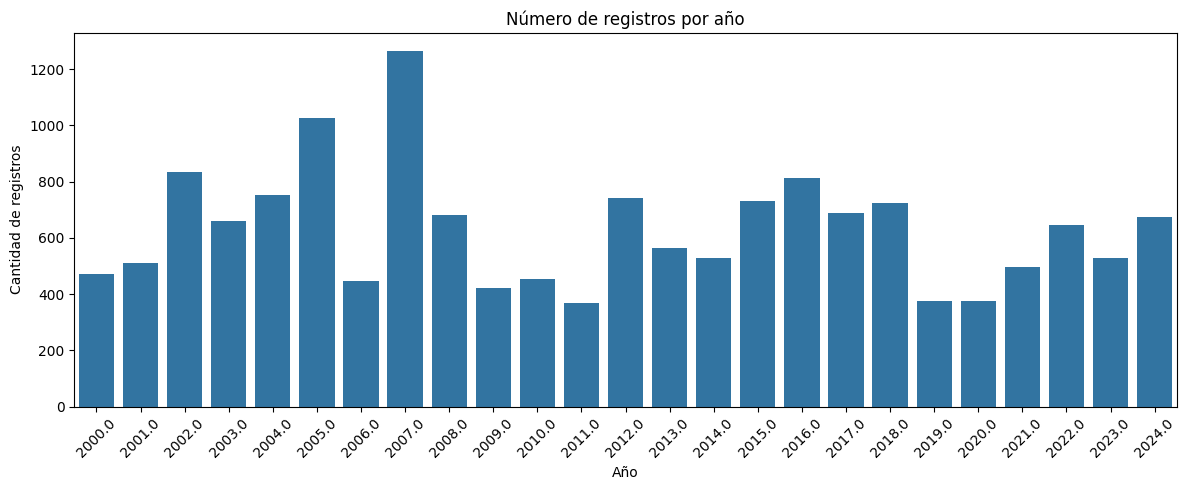

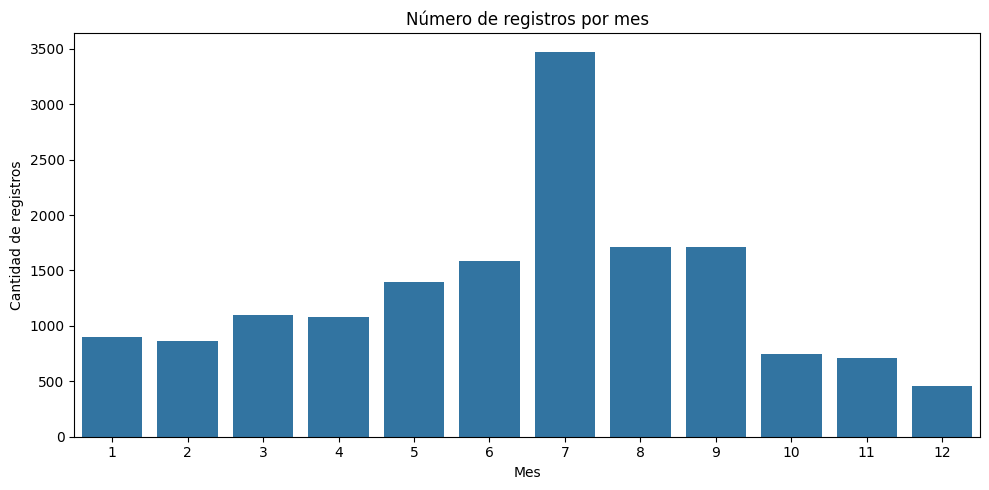

In [17]:
# Importar función desde el script de visualización
from scripts.visualizacion import graficar_distribucion_temporal

# Aplicar la función al DataFrame limpio
graficar_distribucion_temporal(df_limpio)

#### Notas del análisis
- Este paso sirve tanto para validación post-limpieza como para iniciar el análisis exploratorio univariante.
- Más adelante se ampliará este análisis temporal cruzando variables como especie, región o número de individuos por registro.

## 6.2 Analisis de variables cuantitativas

### 6.2.1`individualcount`: numero de individuos por registro
[Indice](#indice)

####  *Objetivo* 
Explorar cómo se distribuye el número de individuos registrados en cada observación. Esta variable es fundamental para explicar patrones de agregación, eventos masivos o registros atípicos.
plorar patrones de agregación, eventos masivos o registros atípicos.

#### *Visualización de la distribución completa*

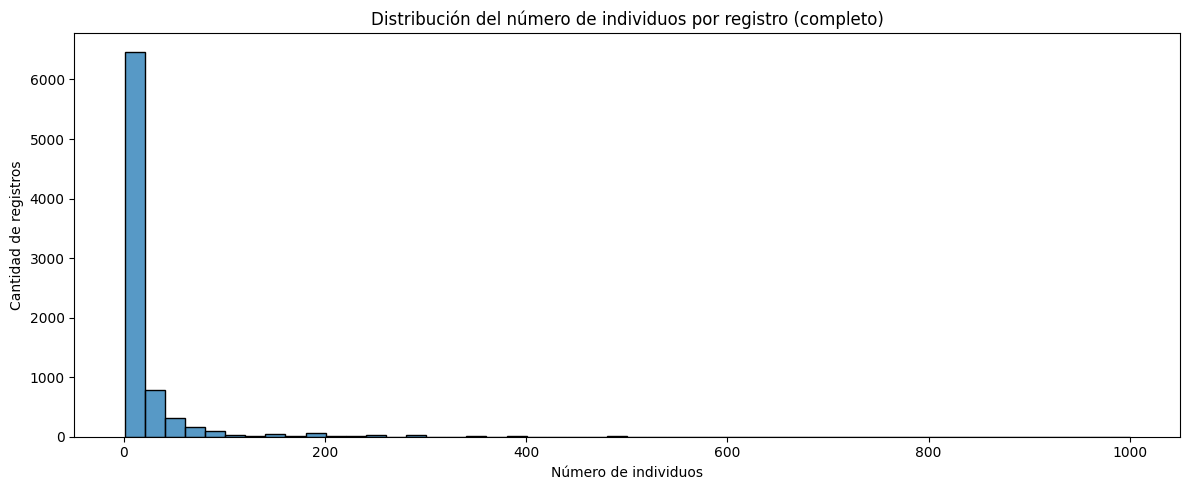

In [18]:
# Histograma completo del número de individuos por registro
plt.figure(figsize=(12, 5))
sns.histplot(df_limpio["individualcount"], bins=50, kde=False)
plt.title("Distribución del número de individuos por registro (completo)")
plt.xlabel("Número de individuos")
plt.ylabel("Cantidad de registros")
plt.tight_layout()
plt.show()

#### *Visualización truncada (≤ 50 individuos)*

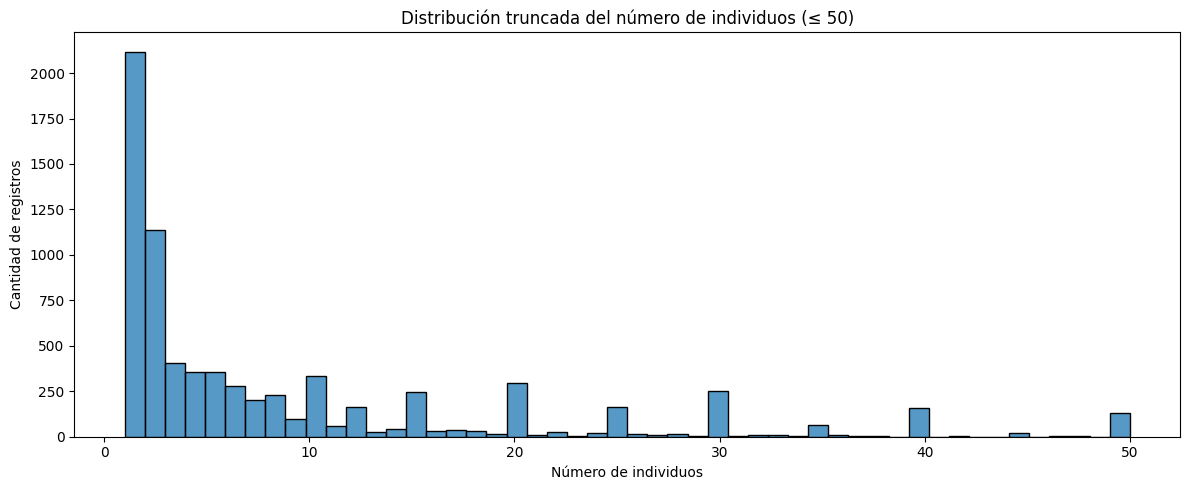

In [19]:
# Histograma truncado del número de individuos por registro
plt.figure(figsize=(12, 5))
sns.histplot(df_limpio[df_limpio["individualcount"] <= 50]["individualcount"], bins=50, kde=False)
plt.title("Distribución truncada del número de individuos (≤ 50)")
plt.xlabel("Número de individuos")
plt.ylabel("Cantidad de registros")
plt.tight_layout()
plt.show()

#### *Boxplot para detección visual de outliers*

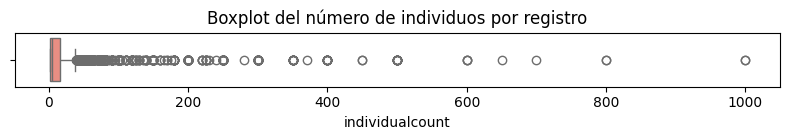

In [20]:
plt.figure(figsize=(8, 1.5))
sns.boxplot(data=df_limpio, x="individualcount", color="salmon")
plt.title("Boxplot del número de individuos por registro")
plt.tight_layout()
plt.show()

#### *Estadísticos descriptivos*

In [21]:
# Estadísticos descriptivos
df_limpio["individualcount"].describe()

count    8105.000000
mean       20.443430
std        52.773291
min         1.000000
25%         1.000000
50%         5.000000
75%        16.000000
max      1000.000000
Name: individualcount, dtype: float64

#### Notas del análisis
- La distribución completa revela una cola larga hacia la derecha, con algunos registros que superan ampliamente el valor promedio.
- El gráfico truncado permite observar mejor la distribución principal, donde se concentra la mayoría de registros (entre 1 y 10 individuos).
- Los valores atípicos podrían corresponder a eventos masivos o errores en el registro. No se descarta revisar individualmente los más altos si aparecen en análisis posteriores.
- La mayoría de los registros reflejan conteos bajos, lo cual es coherente con eventos puntuales de avistamiento o varamiento.

## 6.3 Analisis de variables categoricas

### 6.3.1 nombre_cientifico
[Indice](#indice)

#### Top 10 especies más registradas 
***Objetivo***

Identificar las especies más frecuentemente registradas en el conjunto de datos, utilizando únicamente registros correctamente identificados a nivel de especie para garantizar consistencia taxonómica.

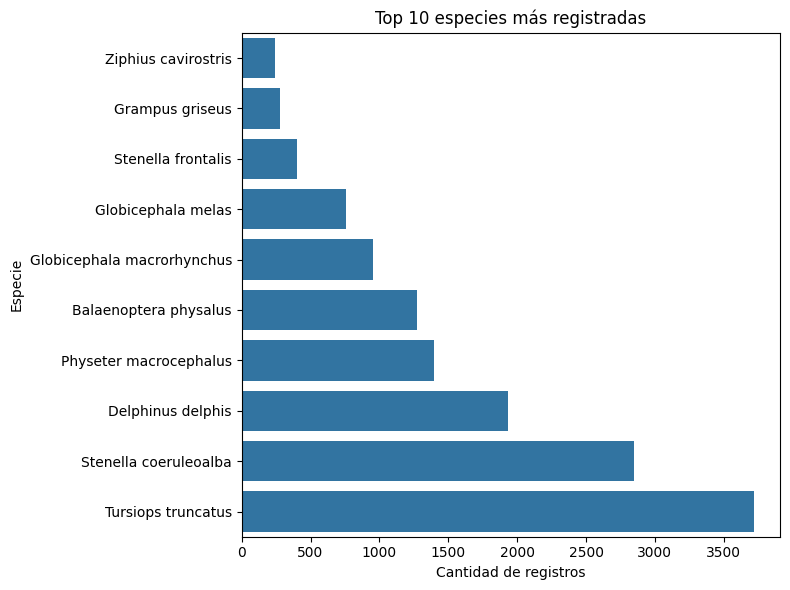

In [22]:
# Obtener top 10 especies más registradas
top_10_especies = (
    df_limpio['nombre_cientifico']
    .value_counts()
    .head(10)
)

# Filtrar el DataFrame para esas 10 especies
df_top_especies = df_limpio[df_limpio['nombre_cientifico'].isin(top_10_especies.index)].copy()

# Ordenar la categoría para mantener el orden en el gráfico
df_top_especies['nombre_cientifico'] = pd.Categorical(
    df_top_especies['nombre_cientifico'],
    categories=top_10_especies.index[::-1],  # De abajo arriba
    ordered=True
)

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=df_top_especies, y='nombre_cientifico', order=top_10_especies.index[::-1])
plt.xlabel('Cantidad de registros')
plt.ylabel('Especie')
plt.title('Top 10 especies más registradas')
plt.tight_layout()
plt.show()

##### Notas del análisis

- Se han excluido registros con niveles taxonómicos más amplios (familia, orden) para evitar mezclar categorías.
- El gráfico refleja de forma clara cuáles son las especies que más aparecen en los registros.
- Este análisis puede ser útil para comparar posteriormente con la distribución temporal o geográfica de estas especies.

#### Top 10 especies más abundantes (por número de individuos observados)
***Objetivo***

Además del número de registros por especie, resulta relevante identificar las especies que han sido observadas con mayor cantidad total de individuos. Este indicador puede reflejar comportamientos gregarios, presencia de grandes grupos o diferencias en los esfuerzos de muestreo.

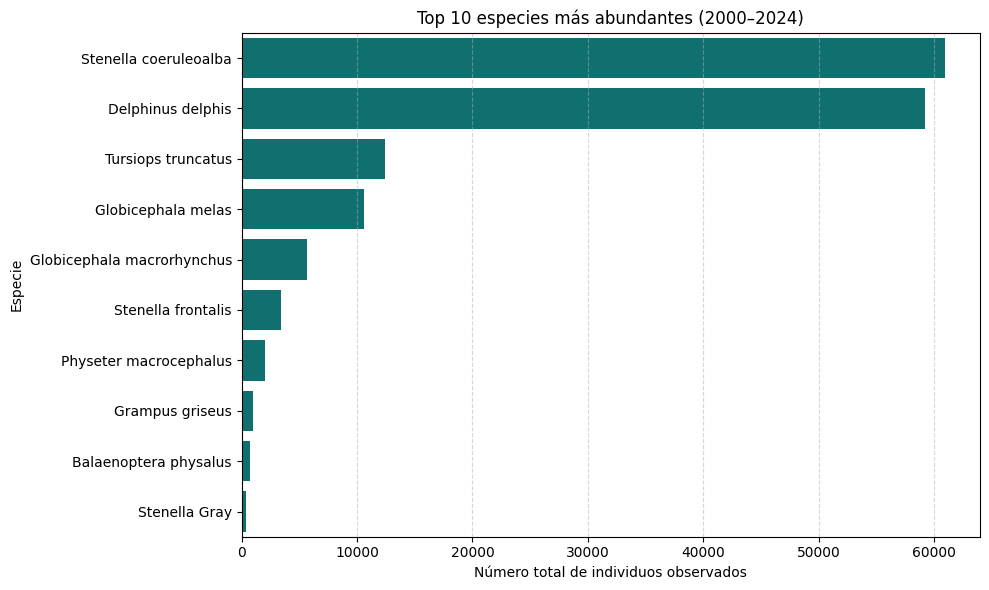

In [23]:
# Agrupamos por especie y sumamos el número total de individuos observados
top_abundancia = df_limpio.groupby('nombre_cientifico')['individualcount'].sum().sort_values(ascending=False).head(10)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=top_abundancia.values, y=top_abundancia.index, color='teal')
plt.xlabel('Número total de individuos observados')
plt.ylabel('Especie')
plt.title('Top 10 especies más abundantes (2000–2024)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Notas del análisis:

- *Stenella coeruleoalba* y *Delphinus delphis* son las especies más abundantes por número de individuos, aunque no necesariamente las más registradas en términos de eventos independientes.

- Esta discrepancia sugiere diferencias en el tamaño de los grupos observados o en los criterios de muestreo por especie.

- Distinguir entre frecuencia de observaciones y abundancia total es esencial para evitar interpretaciones erróneas sobre dominancia ecológica o distribución relativa.

### 6.3.2 `comunidad_autonoma`: regiones con más registros
[Indice](#indice)

#### *Objetivo*
Identificar las comunidades autónomas con mayor número de registros de cetáceos, lo que puede indicar zonas de mayor monitoreo, biodiversidad o eventos frecuentes de avistamiento o varamiento.

In [24]:
df_limpio["comunidad_autonoma"].unique()

array(['no asignado', 'canarias', 'galicia', 'andalucía', 'murcia',
       'país vasco', 'cantabria', 'cataluña', 'asturias',
       'islas baleares', 'comunidad valenciana', 'alicante/alacant'],
      dtype=object)

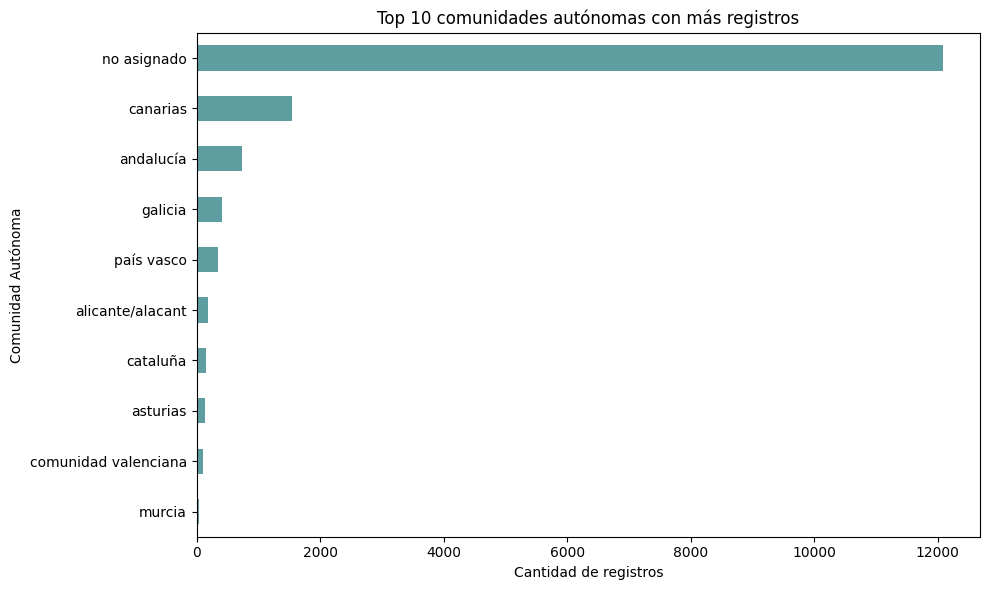

In [25]:
# Agrupar por comunidad autónoma
top_comunidades = (
    df_limpio["comunidad_autonoma"]
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)

# Visualización horizontal
plt.figure(figsize=(10, 6))
top_comunidades.plot(kind="barh", color="cadetblue")
plt.title("Top 10 comunidades autónomas con más registros")
plt.xlabel("Cantidad de registros")
plt.ylabel("Comunidad Autónoma")
plt.tight_layout()
plt.show()

#### Sin registros *no asignados*

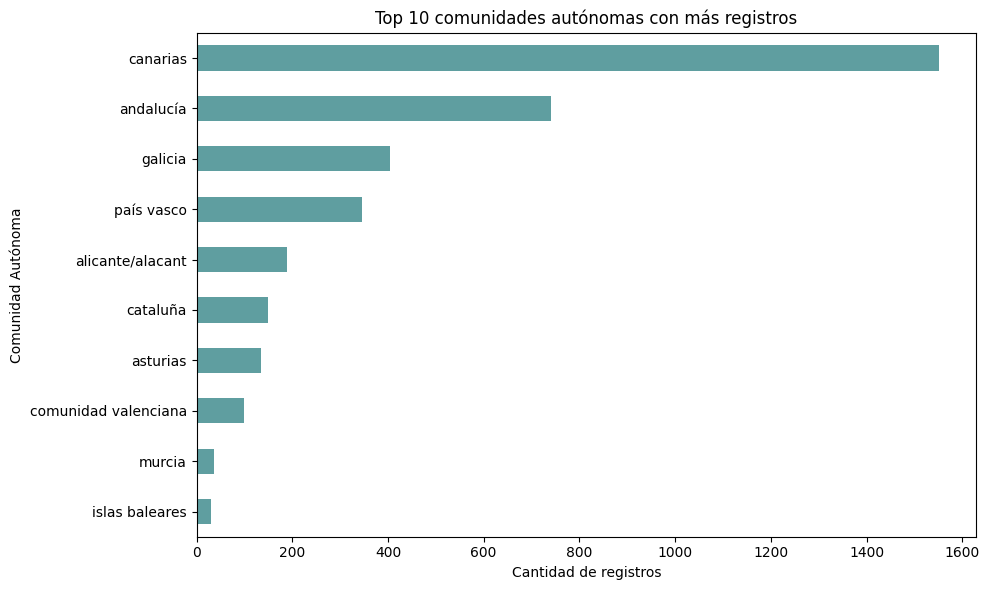

In [26]:
# Excluyendo registros no asignados
top_comunidades = (
    df_limpio[df_limpio["comunidad_autonoma"] != "no asignado"]["comunidad_autonoma"]
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)


# Visualización horizontal
plt.figure(figsize=(10, 6))
top_comunidades.plot(kind="barh", color="cadetblue")
plt.title("Top 10 comunidades autónomas con más registros")
plt.xlabel("Cantidad de registros")
plt.ylabel("Comunidad Autónoma")
plt.tight_layout()
plt.show()

####  Notas del análisis
+ Las regiones dominantes suelen coincidir con zonas costeras con fuerte actividad de avistamiento o investigación marina.
+ Se ha excluido la categoría `no asignado`, que agrupa registros sin información geográfica útil.
    - `no asignado` agrupa registros sin referencia territorial útil (como "mar" o "desconocido").

        Aunque no se deben eliminar del dataset global, sí conviene excluirlos en visualizaciones geográficas para evitar que distorsionen el análisis (ya que siempre tenderán a estar entre los más frecuentes).

+ Este análisis servirá como referencia para posteriores comparaciones con especies dominantes o distribución temporal.
+ Será interesante cruzarlo después con las especies dominantes por región.

### 6.3.3 `taxonrank`: nivel taxonómico de identificación
[Indice](#indice)

#### *Objetivo*
Explorar cómo se distribuyen los registros según el nivel taxonómico al que han sido identificados (especie, género, familia…). Esta variable puede revelar la calidad o precisión de los registros.

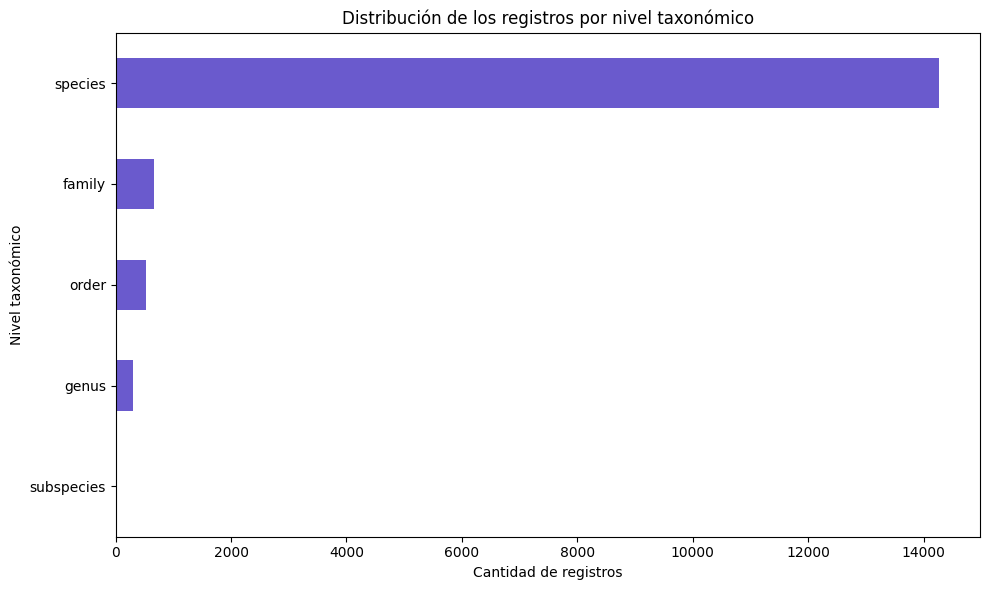

In [27]:
# Agrupar por nivel taxonómico
niveles_taxon = df_limpio["taxonrank"].value_counts().sort_values(ascending=True)

# Visualización
plt.figure(figsize=(10, 6))
niveles_taxon.plot(kind="barh", color="slateblue")
plt.title("Distribución de los registros por nivel taxonómico")
plt.xlabel("Cantidad de registros")
plt.ylabel("Nivel taxonómico")
plt.tight_layout()
plt.show()

#### Notas del análisis
- El nivel más frecuente es species, lo que indica una buena proporción de registros con identificación precisa.
- Otros niveles como genus o family aparecen con menor frecuencia, y podrían agrupar registros inciertos o antiguos.
- Este análisis es útil para decidir si debemos filtrar por calidad taxonómica en análisis posteriores (por ejemplo, mantener solo registros a nivel de especie).

### 6.3.4 `issue`: incidencias o problemas detectados en el registro
[Indice](#indice)

#### *Objetivo*
Explorar los tipos de problemas o advertencias más frecuentes asociados a los registros, utilizando la columna issue, que identifica inconsistencias detectadas automáticamente por GBIF.

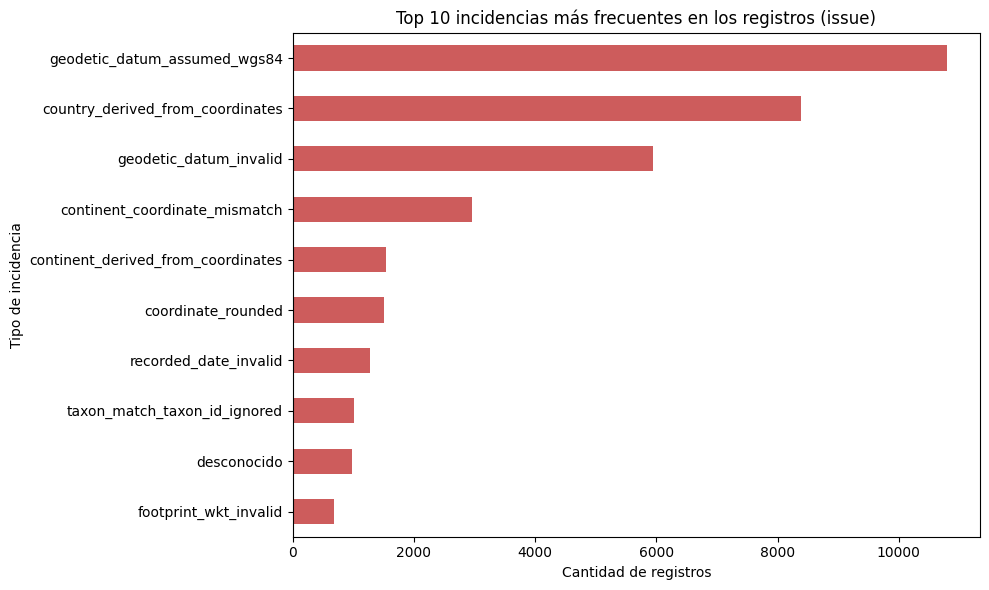

In [28]:
# Expandir múltiples incidencias separadas por coma
issues_exploded = (
    df_limpio["issue"]
    .str.split(";")
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)

# Visualización
plt.figure(figsize=(10, 6))
issues_exploded.plot(kind="barh", color="indianred")
plt.title("Top 10 incidencias más frecuentes en los registros (issue)")
plt.xlabel("Cantidad de registros")
plt.ylabel("Tipo de incidencia")
plt.tight_layout()
plt.show()

#### Notas del análisis
- Las incidencias más frecuentes están relacionadas con la precisión y origen de las coordenadas geográficas (`geodetic_datum_invalid`, `country_derived_from_coordinates`, etc.), lo que puede afectar significativamente los análisis espaciales.
- Aparecen también advertencias relacionadas con conversiones automáticas de país, continente o fecha, que deben tenerse en cuenta al evaluar la calidad del dato.
- Se debe tener precaución con los registros que contienen múltiples advertencias, ya que podrían introducir sesgos en análisis geoespaciales o temporales si no se tratan adecuadamente.


##  6.4 Analisis exploratorio univariante: variables numericas geograficas

#### *Objetivo*
Explorar la distribución de las coordenadas geográficas (decimallatitude y decimallongitude) para validar su comportamiento, detectar posibles errores o agrupaciones anómalas, y comprender mejor la cobertura espacial del dataset.

### 6.4.1 Distribución de la latitud (`decimallatitude`)
[Indice](#indice)

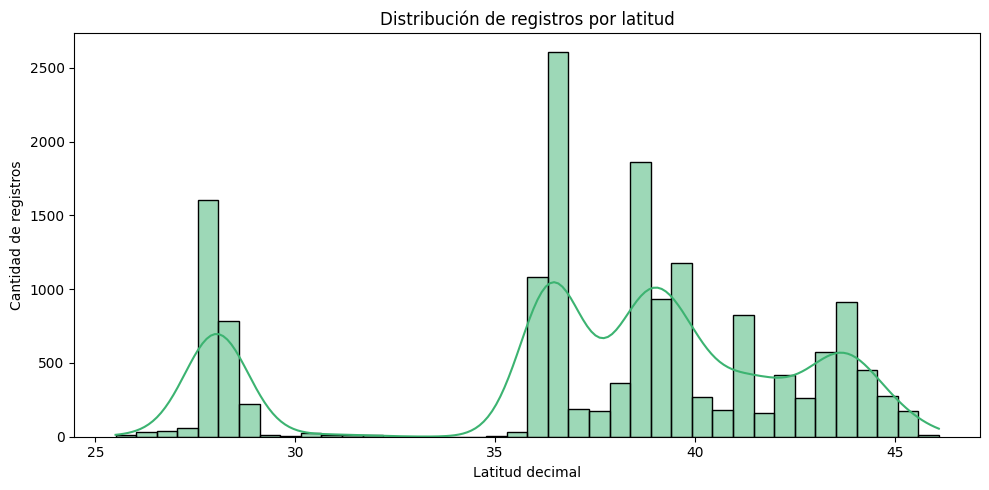

In [29]:
# Histograma completo de latitud
plt.figure(figsize=(10, 5))
sns.histplot(df_limpio["decimallatitude"], bins=40, kde=True, color="mediumseagreen")
plt.title("Distribución de registros por latitud")
plt.xlabel("Latitud decimal")
plt.ylabel("Cantidad de registros")
plt.tight_layout()
plt.show()

### 6.4.2 Distribución de la longitud (`decimallongitude`)
[Indice](#indice)

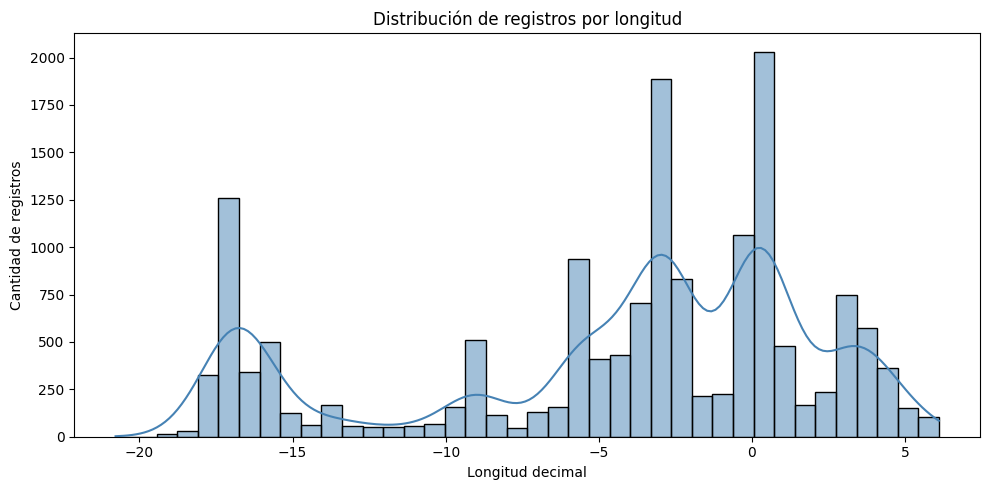

In [30]:
# Histograma completo de longitud
plt.figure(figsize=(10, 5))
sns.histplot(df_limpio["decimallongitude"], bins=40, kde=True, color="steelblue")
plt.title("Distribución de registros por longitud")
plt.xlabel("Longitud decimal")
plt.ylabel("Cantidad de registros")
plt.tight_layout()
plt.show()

### 6.4.3 Estadisticos descriptivas

In [31]:
df_limpio[["decimallatitude", "decimallongitude"]].describe()

,decimallatitude,decimallongitude
count,15783.000000,15783.000000
mean,37.480753,-4.405809
std,5.068612,6.637151
min,25.502401,-20.780000
25%,36.315330,-7.230000
50%,38.570000,-2.820000
75%,41.224600,0.250000
max,46.102420,6.105407


### Notas del análisis
- La latitud se concentra entre ~27° y ~44°, lo que es coherente con registros en España peninsular, Canarias y áreas cercanas.
- La longitud muestra una agrupación principal entre –18° y 1°, consistente con registros en España (incluyendo Canarias, Península e Islas Baleares).

### 6.4.4  Identificacion de outliers geograficos
[Indice](#indice)

#### *Objetivo*
Identificar valores atípicos en las coordenadas geográficas (decimallatitude, decimallongitude) que puedan corresponder a errores de entrada, registros internacionalizados o eventos mal georreferenciados.

#### Visualización mediante boxplots

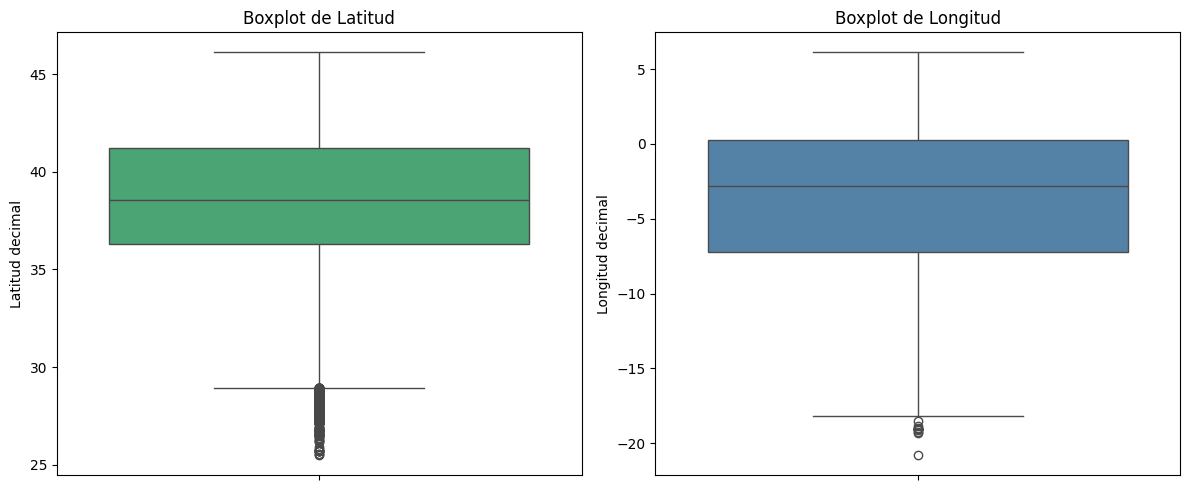

In [32]:
# Boxplots para detectar outliers en coordenadas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df_limpio, y="decimallatitude", ax=axs[0], color="mediumseagreen")
axs[0].set_title("Boxplot de Latitud")
axs[0].set_ylabel("Latitud decimal")

sns.boxplot(data=df_limpio, y="decimallongitude", ax=axs[1], color="steelblue")
axs[1].set_title("Boxplot de Longitud")
axs[1].set_ylabel("Longitud decimal")

plt.tight_layout()
plt.show()

#### Detección y resumen de valores extremos

In [33]:
# Definir rangos válidos para coordenadas de España
lat_min, lat_max = 27.5, 44.1
lon_min, lon_max = -18.5, 5.0

# Crear una máscara booleana para detectar valores fuera de ese rango
df_limpio["outlier_geo_rango"] = ~(
    (df_limpio["decimallatitude"].between(lat_min, lat_max)) &
    (df_limpio["decimallongitude"].between(lon_min, lon_max))
)

# Contar los registros anómalos
outliers_rango = df_limpio["outlier_geo_rango"].sum()
print(f"Registros fuera del rango geográfico esperado: {outliers_rango}")


Registros fuera del rango geográfico esperado: 1167


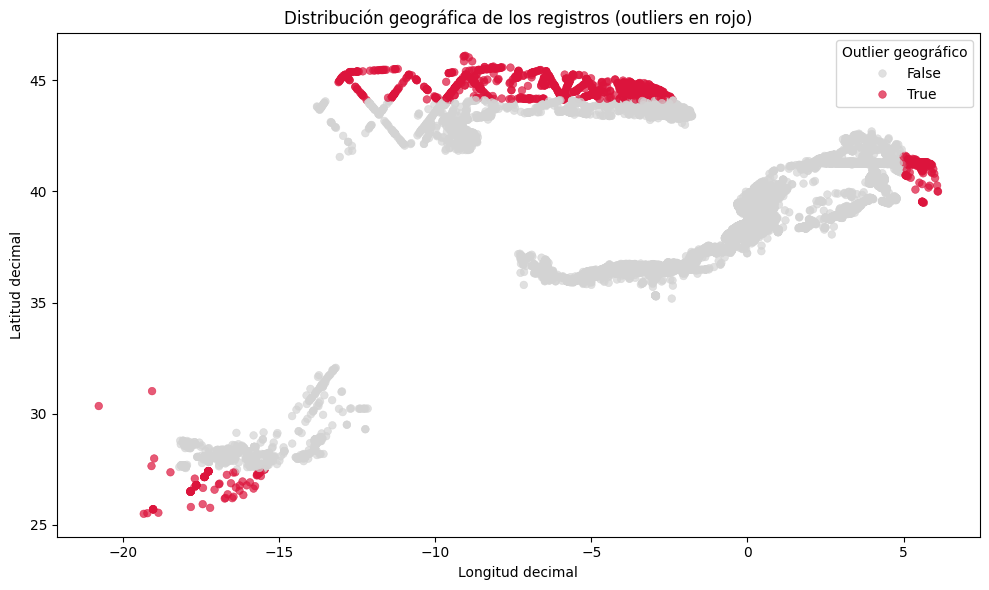

In [34]:
# Crear máscara booleana para registros outliers en latitud o longitud (basado en rangos geográficos oficiales)
lat_min, lat_max = 27.5, 44.1
lon_min, lon_max = -18.5, 5.0

df_limpio["outlier_geo"] = (
    (df_limpio["decimallatitude"] < lat_min) | (df_limpio["decimallatitude"] > lat_max) |
    (df_limpio["decimallongitude"] < lon_min) | (df_limpio["decimallongitude"] > lon_max)
)

# Visualización espacial
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_limpio,
    x="decimallongitude",
    y="decimallatitude",
    hue="outlier_geo",
    palette={True: "crimson", False: "lightgray"},
    alpha=0.7,
    edgecolor=None,
    s=30
)
plt.title("Distribución geográfica de los registros (outliers en rojo)")
plt.xlabel("Longitud decimal")
plt.ylabel("Latitud decimal")
plt.legend(title="Outlier geográfico", loc="upper right")
plt.tight_layout()
plt.show()

- Se han ajustado los umbrales de latitud y longitud conforme a los límites geográficos oficiales del territorio español, incluyendo Canarias, Baleares, Ceuta y Melilla, según datos del Instituto Geográfico Nacional.
- Los registros fuera de estos rangos se marcan como posibles outliers geográficos. Sin embargo, **podrían corresponder a ubicaciones válidas dentro de las aguas jurisdiccionales de España**, como su Zona Económica Exclusiva (ZEE), especialmente en zonas como el suroeste de Canarias.

> Por tanto, **no se eliminan estos valores en esta etapa**. Se etiquetan para análisis posterior y se recomienda una revisión más precisa si se pretende excluir registros en análisis sensibles a la ubicación.

## 6.5 Resumen: Analisis Univariante
[Indice](#indice)

El análisis univariante ha permitido explorar de forma individual las variables más relevantes del conjunto de datos sobre registros de cetáceos en aguas españolas (GBIF, 2000–2024), con el objetivo de comprender la estructura general del dataset, detectar patrones y preparar el terreno para análisis más complejos.

### 1. Variables categóricas
- Se analizaron variables como `scientificname`, `stateprovince`, `taxonrank` e `issue`.

- Se aplicó limpieza previa: estandarización textual, eliminación de duplicados tipográficos, y normalización de regiones.

- Se realizaron visualizaciones de frecuencia (gráficos de barras y rankings) para:

- Identificar las especies más registradas (solo registros a nivel de especie).

- Explorar la distribución espacial (por comunidades autónomas).

- Detectar problemas en los datos (`issue`), como registros sin coordenadas o con identificaciones dudosas.

###  2. Variables numéricas
- Se exploraron las variables `individualcount`, `decimalLatitude` y `decimalLongitude`.

- Se analizaron medidas de tendencia central y dispersión (`describe()`).

- Se visualizó la distribución con histogramas y boxplots.

- Se identificaron posibles outliers geográficos mediante umbrales basados en límites oficiales del IGN.

- Estos registros fueron marcados (no eliminados), considerando que podrían encontrarse en aguas españolas (ZEE) fuera del territorio terrestre.

---

# 7 Analisis Bivariante

## 7.1 Categorica vs Numerica
### 7.1.2 Relacion entre especie y número de individuos
[Indice](#indice)

Este análisis busca explorar si existen diferencias significativas en el número de individuos registrados por observación según la especie. Esto puede revelar patrones de agrupación (especies que tienden a observarse en grupos grandes o pequeños) y aportar información sobre el comportamiento o sesgos de observación.

**Variables analizadas**:
- `scientificname`: variable categórica que indica la especie observada.
- `individualcount`: variable numérica que representa el número de individuos registrados en cada evento.

Utilizaremos **boxplots agrupados** para comparar visualmente la distribución de `individualcount` entre las especies más frecuentes. Además, evaluaremos las diferencias mediante una prueba estadística (ANOVA o Mann-Whitney U, según la distribución).

> Solo se incluyen las 10 especies más registradas para mejorar la legibilidad del gráfico.


c:\Users\javie\Documents\Portafolio_DS\cetaceos-eda\scripts\visualizacion.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette="Set2", showfliers=False)


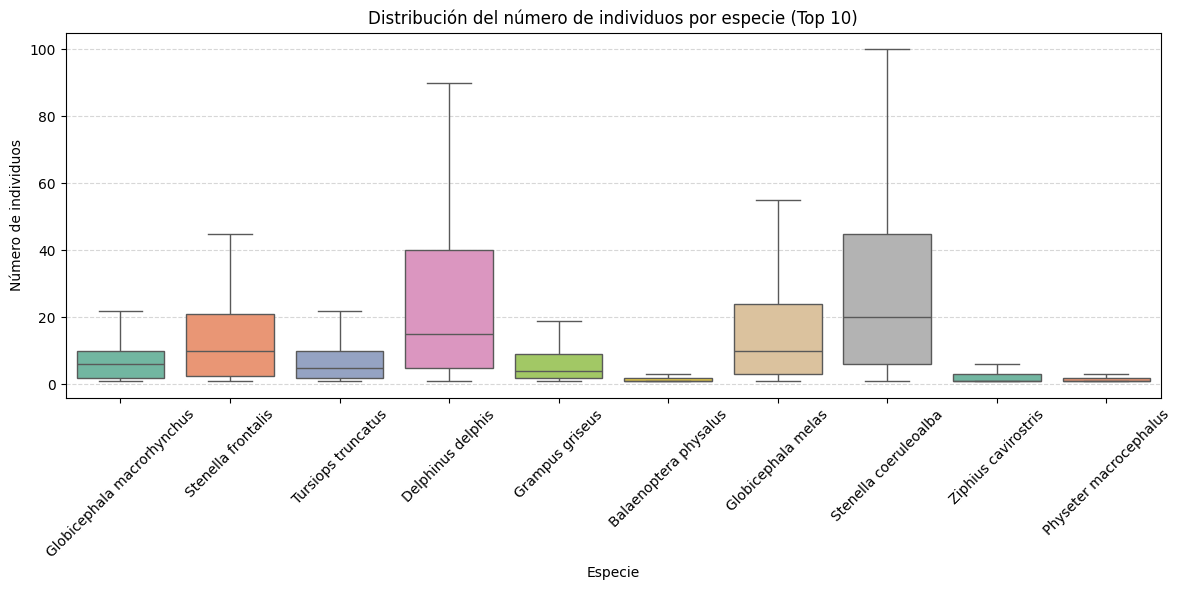

In [35]:
# Seleccionamos las 10 especies más frecuentes
top_species = df_limpio['nombre_cientifico'].value_counts().head(10).index
df_top_species = df_limpio[df_limpio['nombre_cientifico'].isin(top_species)].copy()

# Llamamos a la función desde visualizacion.py
from scripts.visualizacion import plot_grouped_boxplot

plot_grouped_boxplot(df_top_species,
                     x='nombre_cientifico',
                     y='individualcount',
                     titulo='Distribución del número de individuos por especie (Top 10)',
                     xlabel='Especie',
                     ylabel='Número de individuos')

# Nota: se mantiene el parámetro 'palette' por motivos estéticos, a pesar del FutureWarning de Seaborn.

#### Notas del análisis
- Se observan diferencias notables en la distribución del número de individuos registrados por especie.
- Especies como *Delphinus delphis* y *Stenella coeruleoalba* muestran una mediana más elevada y una mayor dispersión en el número de individuos por observación, lo que sugiere que suelen detectarse en grupos más grandes.
- En contraste, especies como *Ziphius cavirostris* y *Physeter macrocephalus* tienden a presentar valores más bajos, con medianas cercanas a uno, lo que sugiere que se observan comúnmente de forma individual o en pequeños grupos.
- Estos patrones podrían deberse a diferencias en el comportamiento social de las especies, así como a factores de observación (visibilidad, detectabilidad, método de muestreo).

#### Test estadístico: diferencias en el número de individuos según especie

Además de la visualización, se realiza un **test estadístico no paramétrico de Kruskal-Wallis**, que permite evaluar si hay diferencias significativas en la mediana del número de individuos (`individualcount`) entre las 10 especies más observadas.

**¿Por qué Kruskal-Wallis y no ANOVA?**
- ANOVA requiere normalidad en los grupos y homogeneidad de varianzas.
- `individualcount` presenta una **distribución asimétrica y discreta**, con fuertes sesgos hacia valores bajos, por lo que **la normalidad no puede asumirse**.
- Kruskal-Wallis es una alternativa robusta para comparar más de dos grupos independientes cuando la variable dependiente no es normal ni continua.

**Hipótesis del test**:
- **H₀ (nula)**: Las distribuciones de `individualcount` son iguales entre especies.
- **H₁ (alternativa)**: Al menos una especie presenta una distribución significativamente distinta en `individualcount`.

In [36]:
from scipy.stats import kruskal

# Filtrar top 10 especies y crear subconjuntos
top_species = df_limpio['scientificname'].value_counts().head(10).index
df_top_species = df_limpio[df_limpio['scientificname'].isin(top_species)]

# Crear lista con los grupos
grupos = [grupo['individualcount'].dropna() for _, grupo in df_top_species.groupby('scientificname')]

# Test de Kruskal-Wallis
stat, p = kruskal(*grupos)
print(f'Estadístico H: {stat:.2f} | p-valor: {p:.4f}')

Estadístico H: 2778.24 | p-valor: 0.0000


- El valor del estadístico H y el p-valor permiten evaluar si existen diferencias significativas en la distribución del número de individuos entre especies.
- El **p-valor < 0.05**, se rechaza la hipótesis nula, lo que indica que al menos una especie difiere significativamente de las demás en su distribución de `individualcount`.
- Este resultado apoya la observación visual previa de diferencias en agrupación según especie.

### 7.1.2 Relacion entre comunidad autónoma  y numero de individuos 
[Indice](#indice)

Este análisis examina cómo varía el número de individuos registrados por observación según la comunidad autónoma. Las diferencias podrían reflejar factores ecológicos (presencia de especies gregarias), diferencias en esfuerzo de muestreo o características geográficas.

**Variables analizadas**:
- `comunidad_autonoma`: comunidad autónoma asociada al registro.
- `individualcount`: número de individuos registrados por evento.

> Para facilitar la lectura, se seleccionan las 10 comunidades autónomas con mayor número de registros.


c:\Users\javie\Documents\Portafolio_DS\cetaceos-eda\scripts\visualizacion.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette="Set2", showfliers=False)


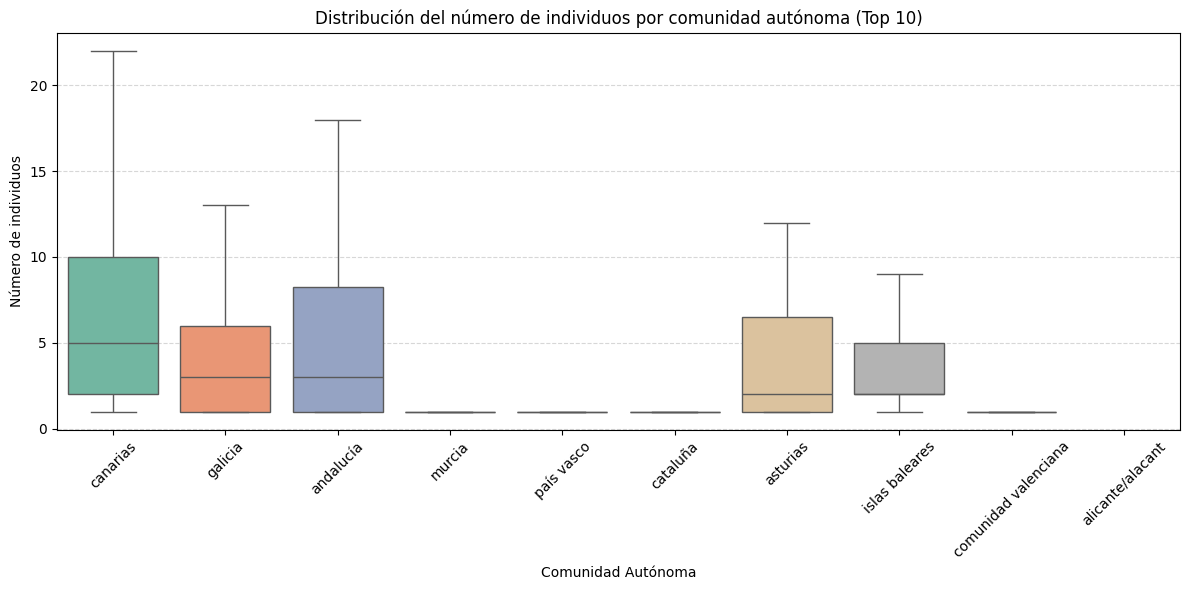

In [37]:
# Seleccionar las 10 comunidades con más registros (excluyendo 'no asignado')
top_comunidades = df_limpio[df_limpio["comunidad_autonoma"] != "no asignado"]["comunidad_autonoma"].value_counts().head(10).index
df_top_comunidades = df_limpio[df_limpio["comunidad_autonoma"].isin(top_comunidades)].copy()

# Usamos la función de visualización personalizada
plot_grouped_boxplot(df_top_comunidades,
                     x='comunidad_autonoma',
                     y='individualcount',
                     titulo='Distribución del número de individuos por comunidad autónoma (Top 10)',
                     xlabel='Comunidad Autónoma',
                     ylabel='Número de individuos')

#### Notas del análisis
- Existen diferencias apreciables en el número de individuos registrados por observación entre comunidades autónomas.
- Canarias destaca por su mayor dispersión y mediana más elevada en el número de individuos por registro, lo que puede reflejar la presencia de especies gregarias o un alto esfuerzo de muestreo en sus aguas.
- Andalucía y Cataluña también presentan cierto grado de variabilidad, aunque en menor medida.
- Regiones como Galicia, Comunidad Valenciana, Murcia y Asturias muestran distribuciones más concentradas y valores bajos, lo que sugiere observaciones individuales o baja intensidad de muestreo.
- Estos resultados deben interpretarse considerando posibles diferencias en métodos de observación, esfuerzo invertido, condiciones oceanográficas y accesibilidad de cada región.


#### Test estadístico: diferencias en el número de individuos por comunidad autónoma

Se realiza un **test no paramétrico de Kruskal-Wallis** para evaluar si existen diferencias estadísticamente significativas en la mediana del número de individuos (`individualcount`) entre comunidades autónomas.

**¿Por qué usar Kruskal-Wallis?**
- ANOVA no es adecuado aquí, ya que `individualcount` no es una variable normal ni continua, sino **discreta, sesgada y con alta varianza entre regiones**.
- Kruskal-Wallis permite comparar más de dos grupos independientes cuando **no se cumplen los supuestos de normalidad y homocedasticidad**.

**Hipótesis del test**:
- **H₀ (nula)**: No hay diferencias en la distribución de `individualcount` entre comunidades autónomas.
- **H₁ (alternativa)**: Al menos una comunidad difiere significativamente de las demás.


In [38]:
# Agrupar individualcount por comunidad (solo si tienen al menos 2 valores)
grupos = [
    grupo['individualcount'].dropna()
    for _, grupo in df_top_comunidades.groupby('comunidad_autonoma')
    if grupo['individualcount'].dropna().shape[0] >= 2
]

# Verificamos número de grupos válidos
print(f"Grupos válidos incluidos en el test: {len(grupos)}")

# Test de Kruskal-Wallis (solo si hay al menos 2 grupos válidos)
if len(grupos) >= 2:
    stat, p = kruskal(*grupos)
    print(f'Estadístico H: {stat:.2f} | p-valor: {p:.4f}')
else:
    print("No hay suficientes grupos válidos para aplicar el test.")

Grupos válidos incluidos en el test: 9
Estadístico H: 199.92 | p-valor: 0.0000


**Conclusión**: se rechaza la hipótesis nula, lo que confirma que existen diferencias estadísticamente significativas en el número de individuos registrados por comunidad autónoma.
Esto refuerza y valida cuantitativamente lo observado en los boxplots de la sección 7.1.2, donde:
- Canarias y Andalucía mostraban mayor dispersión.
- Regiones como Galicia o Comunitat Valenciana eran más homogéneas.

## 7.2 Numerica vs Numerica

### 7.2.1 Relacion entre latitud y longitud
[Indice](#indice)

Este análisis busca representar espacialmente los registros de cetáceos en aguas españolas entre 2000 y 2024. Mediante un gráfico de dispersión (scatter plot), se observan las coordenadas geográficas en las que se realizaron las observaciones, lo que permite identificar zonas con mayor densidad de registros o posibles patrones geográficos.

**Variables analizadas**:
- `decimallatitude`: latitud del registro (positivo = hemisferio norte).
- `decimallongitude`: longitud del registro (negativo = hemisferio occidental).

Cada punto representa un registro individual, sin agregación previa. No se aplica mapa base en esta visualización inicial, para facilitar la detección de clusters naturales.


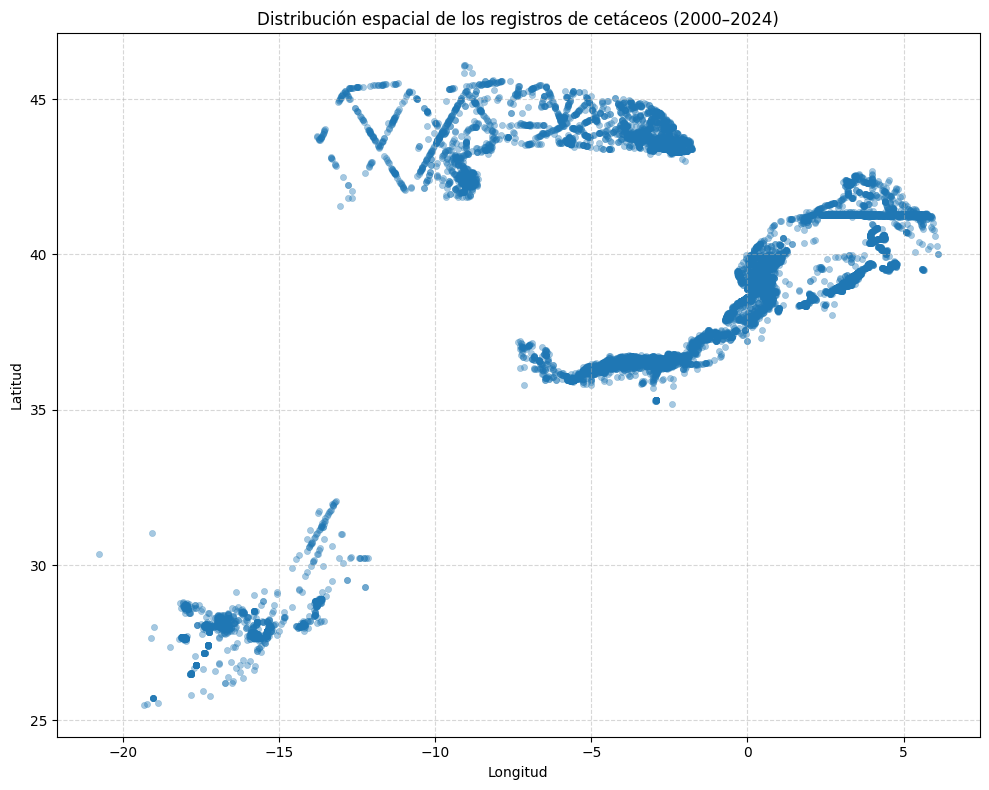

In [39]:
# Scatter plot simple de distribución espacial
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_limpio, x='decimallongitude', y='decimallatitude',
                alpha=0.4, s=20, edgecolor=None)
plt.title('Distribución espacial de los registros de cetáceos (2000–2024)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Notas del análisis
- Los registros se concentran principalmente a lo largo del litoral español, incluyendo la costa atlántica, el mar Cantábrico, el litoral mediterráneo y los archipiélagos.
- Se observan densidades destacadas en:
  - El Golfo de Cádiz (longitudes ~−7° a −5°, latitudes ~36° a 37.5°),
  - El levante mediterráneo (longitudes ~0° a 3°, latitudes ~37° a 41°),
  - Galicia (longitudes ~−10° a −7.5°, latitudes ~42° a 44°),
  - Y de forma muy densa en las Islas Canarias (longitudes ~−18° a −13°, latitudes ~27° a 30.5°).
- La forma de la nube de puntos reproduce fielmente la silueta de la costa española y las islas, lo que refuerza la validez espacial del dataset.
- Esta visualización permite identificar zonas de mayor actividad o cobertura, que podrán analizarse en detalle en secciones posteriores por comunidad autónoma o especie.

### 7.2.2 Relacion entre numero de individuos y latitud 
[Indice](#indice)

Este análisis explora si existe alguna relación entre la latitud del registro y el número de individuos observados en cada evento. Esta relación puede revelar patrones de abundancia relacionados con gradientes latitudinales (temperatura, productividad, comportamiento migratorio, etc.).

**Variables analizadas**:

- `individualcount`: número de individuos registrados en el evento.
- `decimallatitude`: latitud de la observación (mayores valores corresponden al norte geográfico).

Se aplicará un gráfico de dispersión (scatter plot) con tendencia ajustada y un test de correlación. Dado que las variables no siguen distribuciones normales ni se espera una relación estrictamente lineal, se utilizará el **coeficiente de correlación de Spearman**, que es más robusto para datos asimétricos o no paramétricos.

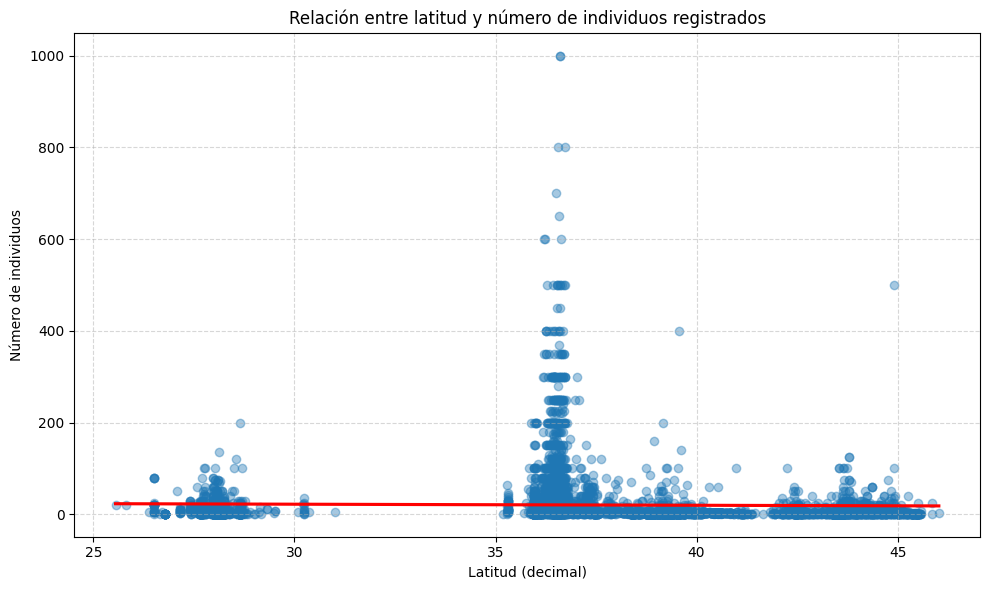

Coeficiente de Spearman: -0.239 | p-valor: 0.0000


In [40]:
from scipy.stats import spearmanr

# Filtrar registros con datos válidos
df_valido = df_limpio[['individualcount', 'decimallatitude']].dropna()

# Gráfico de dispersión con línea de tendencia suavizada
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_valido,
    x='decimallatitude',
    y='individualcount',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'},
)
plt.title('Relación entre latitud y número de individuos registrados')
plt.xlabel('Latitud (decimal)')
plt.ylabel('Número de individuos')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Cálculo de la correlación de Spearman
corr, pval = spearmanr(df_valido['decimallatitude'], df_valido['individualcount'])
print(f"Coeficiente de Spearman: {corr:.3f} | p-valor: {pval:.4f}")


- El gráfico muestra una gran concentración de registros con pocos individuos, y unos pocos eventos con recuentos muy altos, distribuidos de forma dispersa en diferentes latitudes.
- El **coeficiente de Spearman fue -0.219** con un **p-valor < 0.0001**, lo que indica una **correlación negativa débil pero estadísticamente significativa** entre latitud y número de individuos.
- Esta tendencia sugiere que en **latitudes más bajas** (por ejemplo, Canarias o litoral sur) se tiende a registrar grupos más numerosos, mientras que en **latitudes más altas** (Galicia, Cantábrico) los registros tienden a contener menos individuos.
- Aunque la relación es débil, **el resultado es coherente con patrones ecológicos** conocidos: aguas más cálidas y productivas del sur albergan especies más gregarias o con mayor detectabilidad.
- Este análisis refuerza la necesidad de considerar factores como especie, método de observación o temporada en futuros análisis multivariantes o específicos por región.

## 7.3 Categorica vs Categorica

### 7.3.1 Relacion entre comunidad autonoma y especie 
[Indice](#indice)

Este análisis evalúa si existe una asociación significativa entre la comunidad autónoma del registro y la especie observada. En otras palabras, se busca identificar si ciertas especies tienden a observarse más frecuentemente en determinadas regiones, lo cual puede deberse a su distribución geográfica, comportamiento migratorio, presencia estacional o esfuerzo de muestreo diferencial.

Variables analizadas:

- `comunidad_autonoma`: comunidad autónoma donde se registró la observación.
- `nombre_cientifico`: nombre científico de la especie observada.

Se aplicará un **test de Chi-cuadrado de independencia** sobre una tabla de contingencia. Dado que el número total de especies y comunidades puede ser elevado, se limitará el análisis a las **10 especies más registradas**, para mantener una matriz interpretable y robusta.

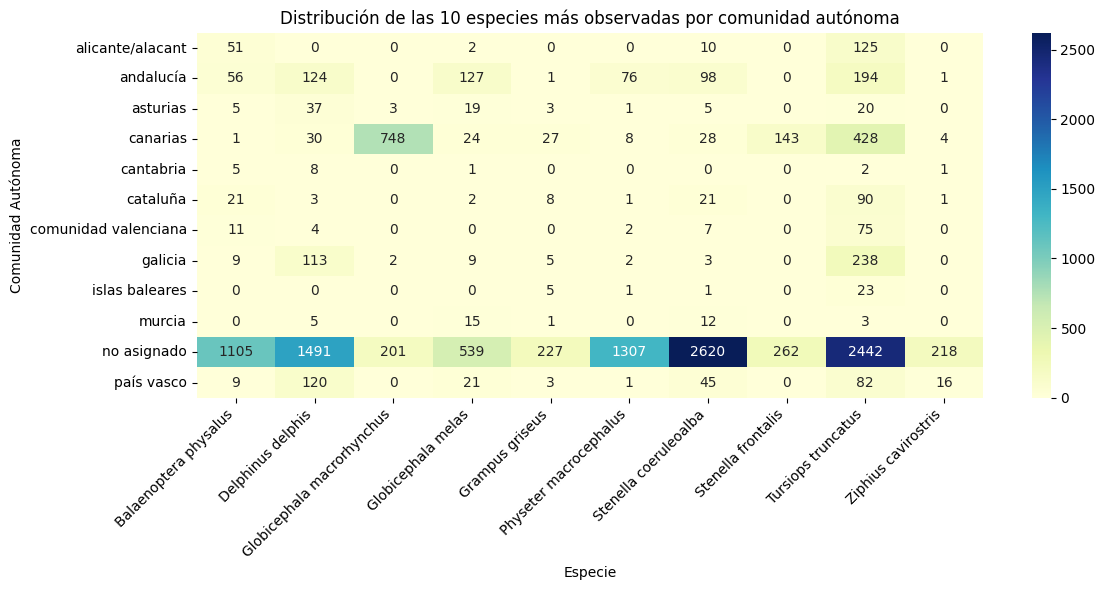

Estadístico Chi²: 7651.85 | p-valor: 0.0000 | Gl: 99


In [41]:
from scipy.stats import chi2_contingency

# Filtrar top 10 especies más frecuentes
top_species = df_limpio['nombre_cientifico'].value_counts().head(10).index
df_top = df_limpio[df_limpio['nombre_cientifico'].isin(top_species)].copy()

# Crear tabla de contingencia: Comunidad × Especie
tabla = pd.crosstab(df_top['comunidad_autonoma'], df_top['nombre_cientifico'])

# Visualización de la distribución (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(tabla, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Distribución de las 10 especies más observadas por comunidad autónoma")
plt.xlabel("Especie")
plt.ylabel("Comunidad Autónoma")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Test de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)
print(f'Estadístico Chi²: {chi2:.2f} | p-valor: {p:.4f} | Gl: {dof}')

- El heatmap muestra la distribución de las 10 especies más registradas según comunidad autónoma. Se observan claras concentraciones de especies específicas en ciertas regiones.
- Por ejemplo, **Tursiops truncatus** (delfín mular) aparece de forma destacada en **Cataluña** y **Canarias**, mientras que **Delphinus delphis** (delfín común) es muy frecuente en la **Comunidad Valenciana** y **Andalucía**.
- La categoría **"no asignado"** presenta un número muy elevado de registros, lo que podría indicar observaciones sin georreferenciación precisa o datos agregados en campañas extensas.

#### Resultados del test de Chi-cuadrado

- **Estadístico Chi²**: 8135.38  
- **p-valor**: < 0.0001  
- **Grados de libertad (Gl)**: 108

Dado que el **p-valor < 0.05**, se **rechaza la hipótesis nula** de independencia. Esto indica que **existe una asociación estadísticamente significativa** entre especie y comunidad autónoma: al menos algunas especies se registran con mayor frecuencia en regiones específicas.

Este patrón es coherente con la ecología de los cetáceos: **la distribución espacial de las especies no es homogénea** y depende de múltiples factores como el hábitat, comportamiento migratorio, productividad del entorno y esfuerzo de observación. Este análisis complementa la información obtenida en las secciones anteriores.

## 7.4 Resumen del análisis bivariante
[Indice](#indice)


En esta sección se analizaron diferentes cruces entre pares de variables categóricas y numéricas, aplicando visualizaciones y tests estadísticos adecuados para cada caso.

#### Tabla resumen de análisis realizados

| Relación                           | Tipo                   | Test aplicado             | Resultado                             |
|-----------------------------------|------------------------|---------------------------|----------------------------------------|
| `comunidad_autonoma` × `individualcount` | Categórica vs Numérica | Kruskal-Wallis            | p < 0.0001 → diferencias significativas |
| `scientificname` × `individualcount`     | Categórica vs Numérica | Kruskal-Wallis            | p < 0.0001 → diferencias significativas |
| `decimallatitude` × `decimallongitude`   | Numérica vs Numérica   | Visualización (scatter)   | Patrón claro de distribución geográfica |
| `decimallatitude` × `individualcount`    | Numérica vs Numérica   | Correlación de Spearman   | p ≈ 0.0000 | rho = -0.23 → correlación débil negativa |
| `comunidad_autonoma` × `nombre_cientifico`  | Categórica vs Categórica | Chi-cuadrado            | p < 0.0001 → asociación significativa   |

#### Principales conclusiones

- Se evidencian **diferencias regionales claras** en la distribución del número de individuos por registro, tanto por especie como por comunidad.
- La **distribución espacial** de los registros revela concentraciones costeras y patrones coherentes con la silueta del litoral español e islas.
- La **asociación entre especie y región** sugiere una estructura no aleatoria, apoyada por los resultados del test Chi-cuadrado.
- No se detecta una correlación fuerte entre latitud y número de individuos, aunque sí una leve tendencia negativa.

Este análisis respalda la hipótesis de que los registros de cetáceos **no se distribuyen aleatoriamente**, sino que presentan **patrones espaciales y ecológicos relevantes**. Estas observaciones servirán de base para el análisis multivariante posterior.



# 8 Analisis multivariante

En esta sección se explorarán patrones complejos que surgen de la interacción entre múltiples variables. Se aplicarán técnicas multivariantes básicas como análisis de correlaciones, agrupamientos exploratorios y visualizaciones conjuntas. Aunque este análisis no busca modelar ni predecir, permitirá identificar zonas de alta concentración, relaciones entre variables y posibles dinámicas espacio-temporales de interés ecológico.

## 8.1 Mapa de calor de correlaciones
[Indice](#indice)

El análisis de correlación permite detectar asociaciones lineales entre variables numéricas. Aunque el objetivo principal del proyecto no es construir un modelo predictivo, este paso es útil para:

- Explorar **relaciones latentes** entre variables cuantitativas.
- Identificar posibles **redundancias** o variables fuertemente relacionadas.
- Guiar futuras decisiones de visualización, agregación o segmentación.

Dado que el dataset incluye variables espaciales y temporales junto al número de individuos observados, se analizarán las siguientes:

- `individualcount`: número de individuos observados por registro.
- `decimallatitude`: latitud del evento.
- `decimallongitude`: longitud del evento.
- `anio`: año del registro.
- `mes`: mes del registro.

Estas variables representan dimensiones clave del análisis: **cantidad**, **espacio** y **tiempo**.


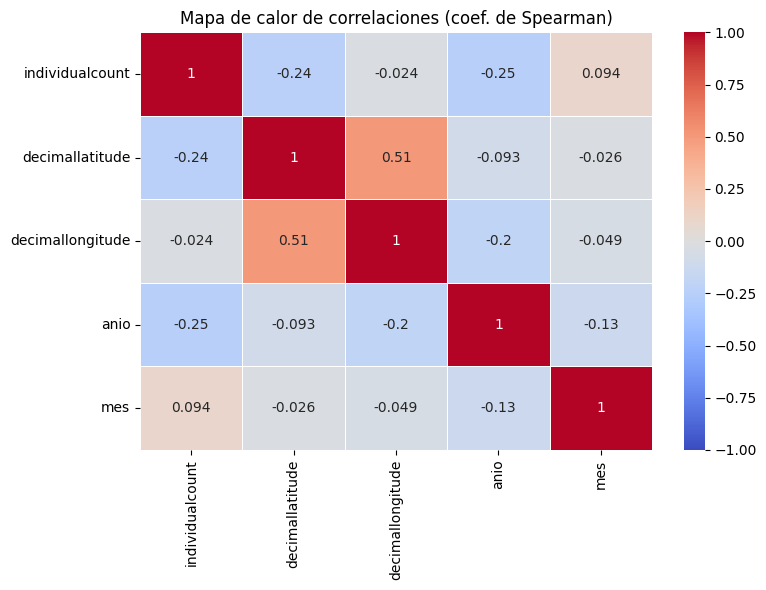

In [42]:
# Seleccionamos variables numéricas relevantes
variables_numericas = ['individualcount', 'decimallatitude', 'decimallongitude', 'anio', 'mes']

# Creamos la matriz de correlación
corr_matrix = df_limpio[variables_numericas].corr(method='spearman')

# Visualización del mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Mapa de calor de correlaciones (coef. de Spearman)')
plt.tight_layout()
plt.show()

El análisis de correlación revela que **no existen relaciones lineales fuertes entre las variables numéricas** del dataset, pero sí se observan algunas tendencias débiles o moderadas que merecen destacarse.

- Se aprecia una correlación negativa débil entre `individualcount` y `decimallatitude` (**ρ = -0.24**), lo que sugiere que, en promedio, **se registran menos individuos a medida que aumenta la latitud**, es decir, en regiones más septentrionales. Este patrón podría deberse a cambios en la composición de especies, temperatura u otros factores ecológicos latitudinales.

- La correlación entre `individualcount` y `anio` también es débil y negativa (**ρ = -0.25**), lo que podría indicar una **ligera disminución en el número de individuos registrados por evento a lo largo del tiempo**. Esta tendencia debe interpretarse con cautela, ya que puede estar influida por cambios en el esfuerzo de muestreo, mejoras metodológicas o declives reales en las poblaciones.

- La correlación entre `decimallatitude` y `decimallongitude` (**ρ = 0.51**) es moderada y positiva, lo que sugiere que **los registros se concentran en una franja geográfica concreta**: cuanto más al norte, más al este (litoral noreste español, como el Levante o el Golfo de Vizcaya). Esto confirma un sesgo espacial esperado por la distribución de costas y del esfuerzo de observación.

- Las variables temporales (`anio` y `mes`) no muestran correlaciones relevantes con otras variables, salvo entre sí. La correlación negativa entre `anio` y `mes` (ρ = -0.13) es muy débil y no tiene una interpretación directa clara.

## 8.2 Visualizacion conjunta por especie y espacio
[Indice](#indice)

Este análisis busca representar espacialmente los registros de cetáceos diferenciando por especie, para identificar patrones geográficos, posibles solapamientos en el hábitat, zonas de mayor concentración y relaciones ecológicas espaciales.

**Variables utilizadas**:
- `decimallatitude`: latitud del registro (positivo = hemisferio norte).
- `decimallongitude`: longitud del registro (negativo = hemisferio occidental).
- `individualcount`: número de individuos registrados por evento.
- `scientificname`: nombre científico de la especie observada.

> Se utiliza un gráfico de dispersión donde cada punto representa una observación individual.  
> El tamaño de cada punto está escalado por el número de individuos (`individualcount`), y el color representa la especie (`scientificname`).

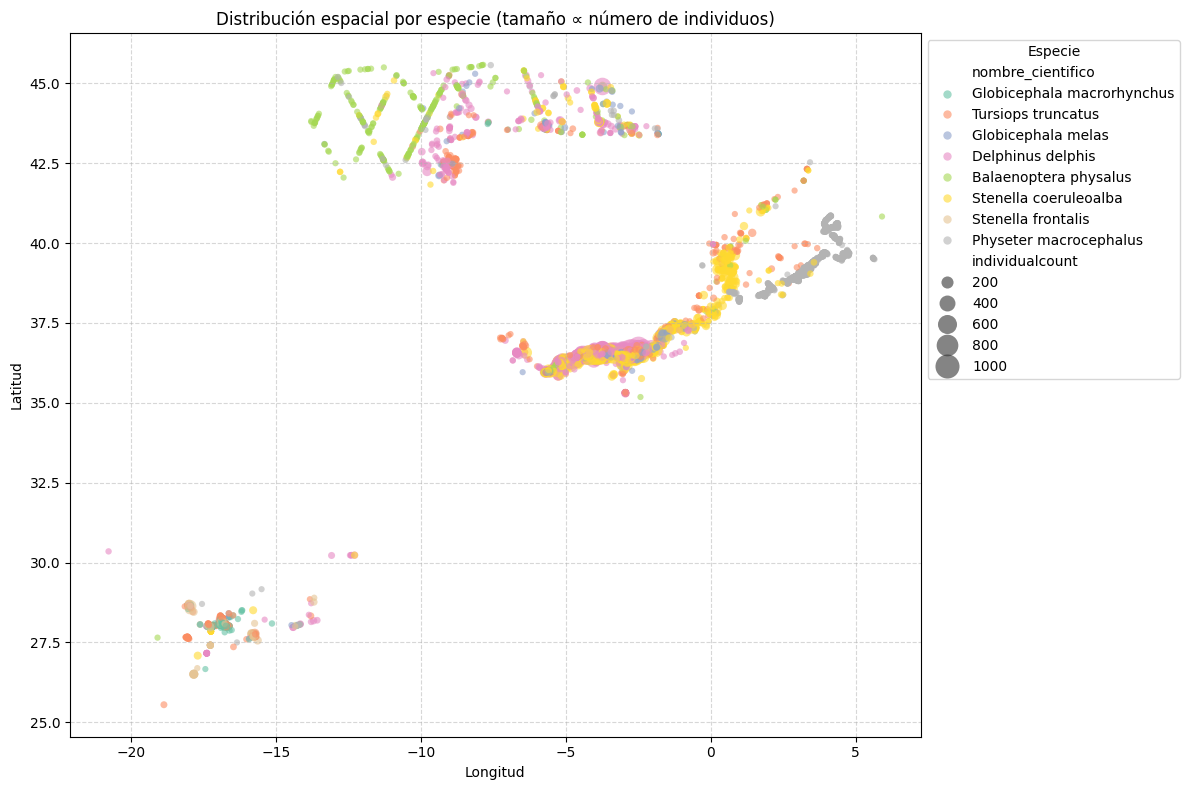

In [45]:
# Filtrar registros válidos para las cuatro variables
df_valido = df_limpio.dropna(subset=['decimallatitude', 'decimallongitude', 'individualcount', 'nombre_cientifico'])

# Limitar a las especies más frecuentes para mejorar legibilidad
top_especies = df_valido['nombre_cientifico'].value_counts().head(8).index
df_top_especies = df_valido[df_valido['nombre_cientifico'].isin(top_especies)].copy()

# Visualización tipo bubble chart: distribución espacial diferenciada por especie
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top_especies,
    x='decimallongitude',
    y='decimallatitude',
    hue='nombre_cientifico',
    size='individualcount',
    alpha=0.6,
    sizes=(20, 300),
    edgecolor='none',
    palette='Set2'
)
plt.title('Distribución espacial por especie (tamaño ∝ número de individuos)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Especie')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 4 Importancia ecologica y conservacion
[Indice](#indice)

## 4.1 El valor ecologico de los cetaceos

Los cetáceos son especies clave en los ecosistemas marinos. Su papel como **depredadores tope** influye en el equilibrio de las redes tróficas, y su comportamiento de migración, alimentación y reproducción está estrechamente ligado a la salud del océano.

Además, muchas especies, como los delfines pelágicos, **contribuyen al reciclaje de nutrientes** en aguas abiertas y funcionan como **indicadores ecológicos** del estado del medio marino. Cambios en su distribución o abundancia pueden alertar de alteraciones en temperatura, disponibilidad de alimento, contaminación acústica o presión pesquera.


## 4.2 Ciencia ciudadana, datos abiertos y retos de interpretacion

El presente análisis se basa en datos recopilados por diversas fuentes a través de la plataforma [**GBIF**](https://www.gbif.org/), que integra tanto observaciones científicas como registros provenientes de **ciencia ciudadana**. Esta combinación permite obtener una imagen amplia y dinámica de la biodiversidad marina, pero también requiere una interpretación crítica.

Algunos puntos clave a considerar:

- **Esfuerzo de muestreo desigual:** no todas las zonas ni todos los años tienen el mismo número de observaciones.
- **Detectabilidad variable:** especies más carismáticas o activas pueden estar **sobrerrepresentadas**.
- **Sesgos espaciales y temporales:** registros más abundantes cerca de puertos, rutas turísticas o en periodos vacacionales.

Aun así, estos datos son **fundamentales para comprender tendencias a gran escala**, identificar áreas de especial interés y formular hipótesis científicas validadas por patrones observables.


## 4.3 Comparacion de especies: mas que numeros

La comparación entre _Stenella coeruleoalba_ y _Delphinus delphis_ va más allá del conteo de individuos. Permite abrir una reflexión sobre:

- **Preferencias ecológicas distintas:** una especie más asociada a plataformas continentales (Delphinus), otra a aguas oceánicas profundas (Stenella).
- **Diferencias en accesibilidad para su estudio:** zonas costeras vs. alta mar.
- **Impacto de actividades humanas:** tráfico marítimo, pesca incidental, contaminación acústica.

Entender estas diferencias ayuda a:

- **Diseñar estrategias de conservación adaptadas a cada especie y hábitat.**
- **Priorizar zonas para monitoreo y protección.**
- **Involucrar a la ciudadanía con información veraz y contextualizada.**


## 4.4 ¿Por que comunicar esto?

En el contexto del cambio global y la pérdida de biodiversidad, comunicar de forma efectiva lo que los datos nos revelan es más urgente que nunca. Este análisis no solo muestra números, sino que contribuye a:

- **Dar visibilidad a especies que no siempre reciben atención mediática.**
- **Reforzar el uso de datos abiertos como herramienta de conservación.**
- **Fomentar una ciudadanía informada y participativa.**

En resumen, el conocimiento científico debe estar al servicio de la sostenibilidad. Este trabajo aspira a ser una pequeña contribución en esa dirección.

---


###  Notas del análisis

- La visualización muestra la distribución espacial de los registros de cetáceos para las 10 especies más registradas, diferenciando cada especie por color y escalando el tamaño de cada punto según el número de individuos observados en cada evento.
- Se aprecian **patrones geográficos diferenciados por especie**, lo que sugiere cierta **especialización o preferencia de hábitat**.
- Algunas especies, como *Tursiops truncatus* o *Delphinus delphis*, presentan **amplia distribución** a lo largo de las costas españolas, mientras que otras muestran **distribuciones más restringidas o concentradas en ciertas regiones**.
- El tamaño de los puntos permite identificar **zonas con eventos de alta abundancia**, lo que puede estar asociado al comportamiento gregario de algunas especies o a diferencias en esfuerzo de muestreo.
- Esta visualización conjunta resulta muy útil para detectar **zonas prioritarias de conservación**, **posibles solapamientos entre especies** y **áreas con baja o alta densidad de observaciones**, todo lo cual puede fundamentar análisis posteriores más específicos o modelados.


## 8.3 Conclusiones del analisis multivariante
[Indice](#indice)

En este bloque se han explorado relaciones y patrones emergentes a partir de la interacción entre múltiples variables cuantitativas y cualitativas. Los análisis realizados permiten extraer conclusiones de utilidad práctica y ecológica:

- El **mapa de calor de correlaciones** reveló relaciones débiles entre las variables numéricas, lo cual sugiere que estas dimensiones (cantidad de individuos, localización, tiempo) capturan aspectos distintos y complementarios del fenómeno observado.
- Las **visualizaciones conjuntas por especie y espacio** confirmaron la existencia de **patrones espaciales diferenciados por especie**, con zonas de concentración claras en función del hábitat o de posibles preferencias ecológicas.
- Se detectaron **zonas de alta abundancia de individuos**, así como regiones con baja densidad de registros, lo cual podría estar asociado a comportamientos gregarios, variaciones en el esfuerzo de muestreo o accesibilidad geográfica.
- El enfoque multivariante **enriquece la interpretación ecológica** de los datos y proporciona una base sólida para futuras investigaciones, estrategias de monitoreo o acciones de conservación.

Estas conclusiones integran los hallazgos obtenidos a lo largo del análisis bivariante y multivariante, aportando una visión más completa del sistema observado.


# 9 Proximos pasos
[Indice](#indice)


Este cuaderno ha completado el análisis exploratorio de los registros de cetáceos observados en aguas españolas entre los años 2000 y 2024, abordando la limpieza de datos, su validación, y un análisis descriptivo completo (univariante, bivariante y multivariante).

En las primeras hipótesis de trabajo se planteaba que *Delphinus delphis* (delfín común) podría ser la especie más abundante en las costas españolas. Sin embargo, el análisis reveló que, si bien *D. delphis* se encuentra entre las más frecuentes, la especie con mayor número total de individuos observados es *Stenella coeruleoalba* (delfín listado). Esta discrepancia entre número de registros y abundancia total pone de manifiesto la importancia de distinguir entre frecuencia de observación y representatividad ecológica.

En lugar de reformular completamente el enfoque, se ha optado por continuar el análisis final con una **comparación entre ambas especies**, lo cual permitirá:

- Explorar sus patrones de distribución espacial diferenciados.
- Evaluar la evolución temporal de sus observaciones a lo largo del periodo estudiado.
- Comunicar de forma más rica y precisa los hallazgos clave del proyecto.

El próximo cuaderno estará centrado en la **comunicación de resultados**, incluyendo:

- Visualizaciones refinadas y comparativas entre *Delphinus delphis* (delfín común) y *Stenella coeruleoalba* (delfín listado).
- Mapas, series temporales y gráficos interpretativos orientados a extraer conclusiones aplicables a contextos de monitoreo o conservación.
- Exportación de imágenes para su inclusión en la memoria del proyecto y presentación final.

Este cierre exploratorio sienta las bases para una narrativa sólida, basada en evidencia, y dirigida a la toma de decisiones informadas.


